# Rampa in T del GaSb

Per la prima temperatura  $T_1=78.68$  K si raccoglie lo spettro a 6 diverse intensità [0e5, 1, 2e5, 5, 10, 25]

In [225]:
arr_filtro = ['0e5', '1', '2e5', '5', '10', '25'] # + 'pc'

Per ciascuna delle successive 20 temperature, si raccoglie lo spettro con filtro 0e5.

In [226]:
arr_T = ['78e68', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180',
      '190', '200', '210', '220', '230', '240', '250', '260', '280', '300'] # + 'K'

## Importazioni

In [227]:
from qp2_subroutines import *
import os

In [228]:
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

## Preliminari

Per la costruzione dei nomi dei file

In [229]:
def build_name_GaSb (T: str = None, filtro: str = None):
    # t_acq == 0e1
    # n_acq == 4
    # grating == 35lmm
    # ecc=None
    fen='fen1e1'
    
    if T is None:
        T = '78e68'
    if filtro is None:
        filtro = '0e5'
    
    cartella = 'data/rampa_T_GaSb/'
    name = 'Giak_' + '0e1_4_35lmm_' + T + 'K_' + filtro + 'pc_' + fen + '.asc'
    
    return cartella+name

Per il fit: opto per la somma di N gaussiane.

Il vettore params viene definito come una list di N triple (a, mu, sigma), una per ciascuna gaussiana. Successivamente deve essere 'appiattito' con .flatten() per renderlo un array unidimensionale, trattabile da curve_fit().

In [230]:
def N_gaussiane (x, *params):
    # Inizializzo il risultato
    y = np.zeros_like(x)
    # Sommo una gaussiana per ciascuna entrata della list
    for i in range(0, len(params), 3):  # Scandisco i parametri a gruppi di 3
        A, mu, sigma = params[i], params[i+1], params[i+2]
        y += gaussiana(x, A, mu, sigma)
        
    return y

Servirà dopo per i colori nei grafici.

In [231]:
col = ['red', 'green', 'magenta', 'purple', 'peru', 'cyan', 
       'olive', 'goldenrod', 'black', 'sienna', 'steelblue', 'crimson']

Fare caso al fatto che fit_N_gaussiane prende in argomento il numero di acquisizioni! Il motivo è spiegato bene nella docstring. In breve: serve a correggere con un senso l'errore poissoniano!

---

---

# Analisi

In una prima fase abbiamo anche verificato che 0e1 fosse il tempo di acquisizione ottimale, si potrebbe inserire nell'analisi.

## GaSb: T=79K su INTENSITÀ

#### Contenitore per i dati

In [232]:
# dictionary GaSb
# le keys saranno i filtri
# ciascuna key conterrà le due colonne del file:
# GaSb[filtro][0] - colonna 0 del file (lunghezze d'onda)
# GaSb[filtro][1] - colonna 1 del file (counts)

GaSb_flt = {}

#### Lettura file

In [233]:
for filtro in arr_filtro:
    
    # Costruisco nome file
    name = build_name_GaSb (filtro=filtro)
    # Estraggo i dati 
    waveln, counts = leggi_file_asc (name)
    # Pulisco i counts da valori insensati 
    counts = clean_counts (counts, peak=False)
    # Raccolgo
    GaSb_flt[filtro] = (waveln, counts)

#### Plot su intensità + FIT somma Gaussiane

- - - - - - - - - - - - - - - - - - - - - - - - - -
prevent_overfitting ha RIMOSSO 0 picchi
- - - - - - - - - - - - - - - - - - - - - - - - - -


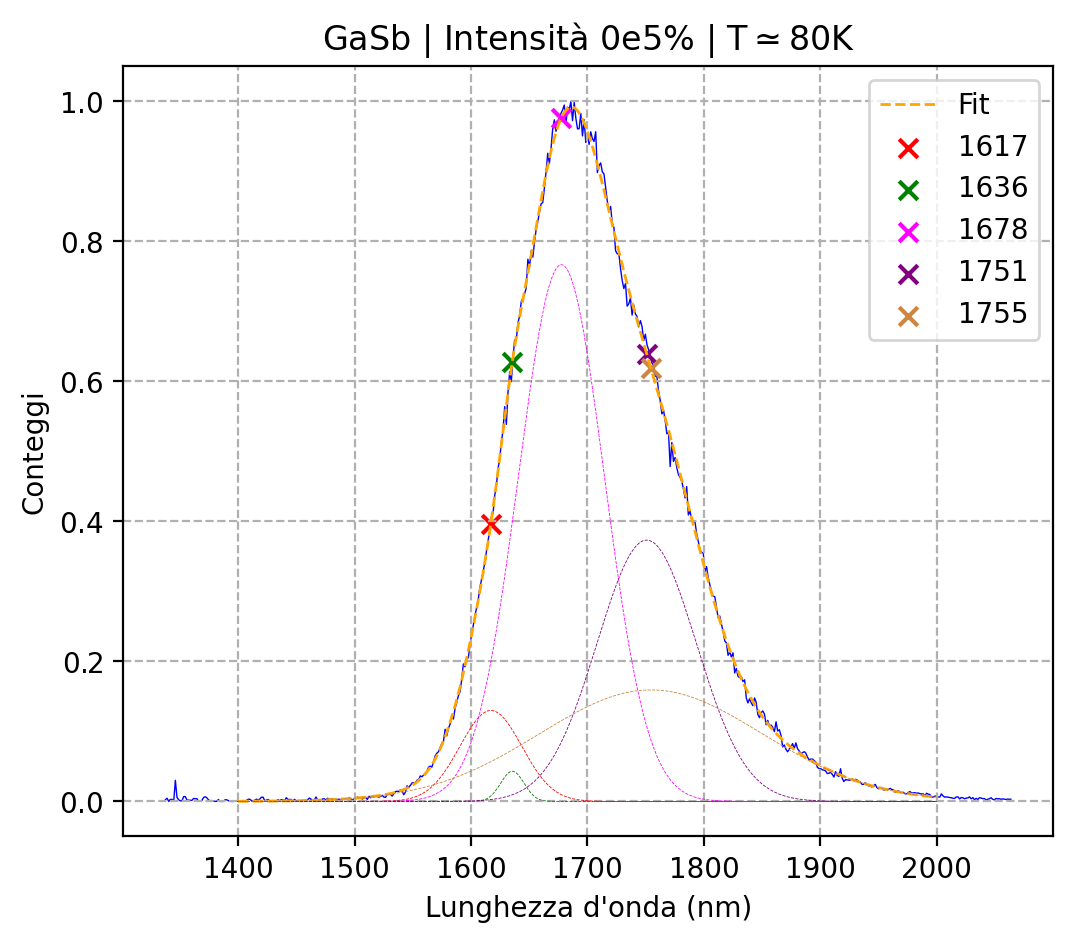

• Gaussiana  1
 - A = 0.04315334964472032
 - mu = 1635.5282113666053
 - sigma = 10.000000000000002
• Gaussiana  2
 - A = 0.15929890841007718
 - mu = 1754.5125914368846
 - sigma = 95.7530317150761
• Gaussiana  3
 - A = 0.7667478832533248
 - mu = 1677.6412150192034
 - sigma = 36.922342517963955
• Gaussiana  4
 - A = 0.12993913670282997
 - mu = 1617.0660853184834
 - sigma = 26.55765772734831
• Gaussiana  5
 - A = 0.3733198011064952
 - mu = 1750.8918010538532
 - sigma = 42.58428093717044
 - chi2rid = inf
- - - - - - - - - - - - - - - - - - - - - - - - - -
prevent_overfitting ha RIMOSSO 0 picchi
- - - - - - - - - - - - - - - - - - - - - - - - - -


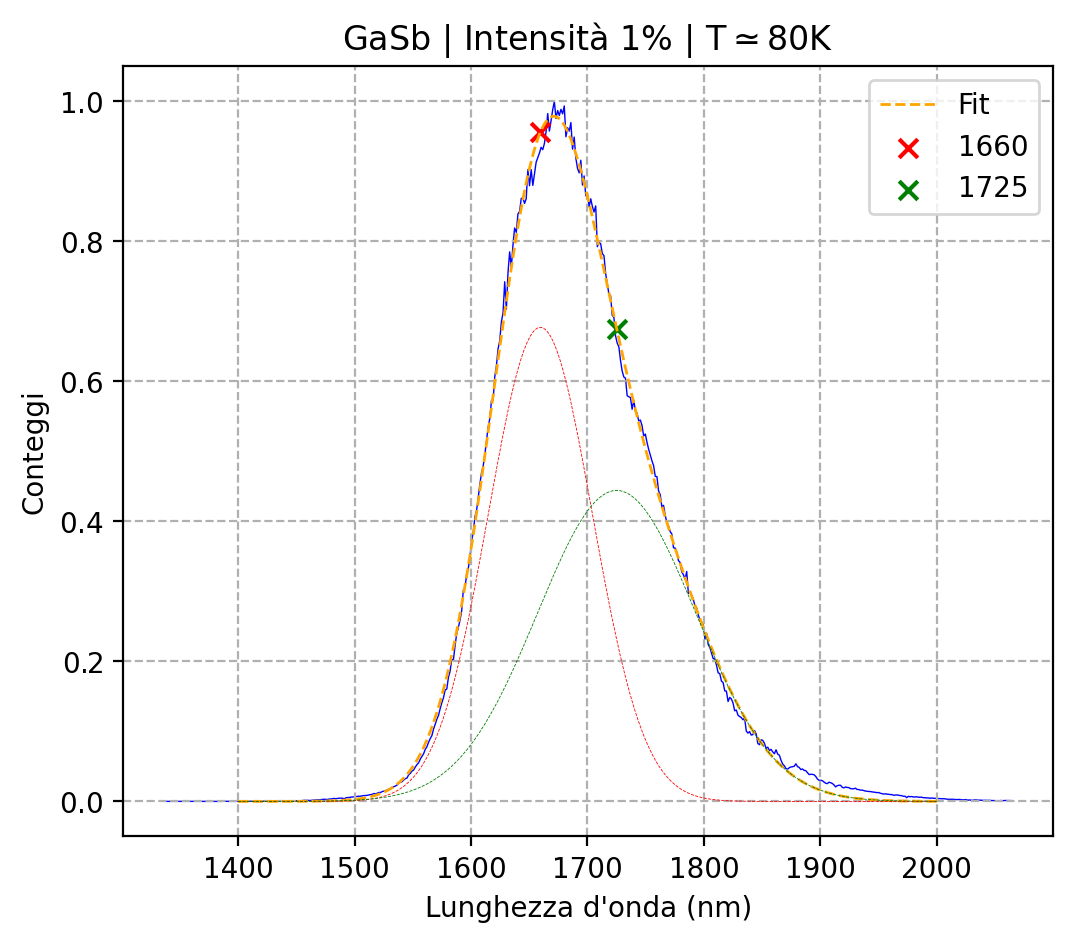

• Gaussiana  1
 - A = 0.6772592866709145
 - mu = 1659.57206781871
 - sigma = 44.697373292795156
• Gaussiana  2
 - A = 0.44428392420563295
 - mu = 1725.1079434022092
 - sigma = 67.88524091566825
 - chi2rid = 0.40882992986797745
- - - - - - - - - - - - - - - - - - - - - - - - - -
prevent_overfitting ha RIMOSSO 0 picchi
- - - - - - - - - - - - - - - - - - - - - - - - - -


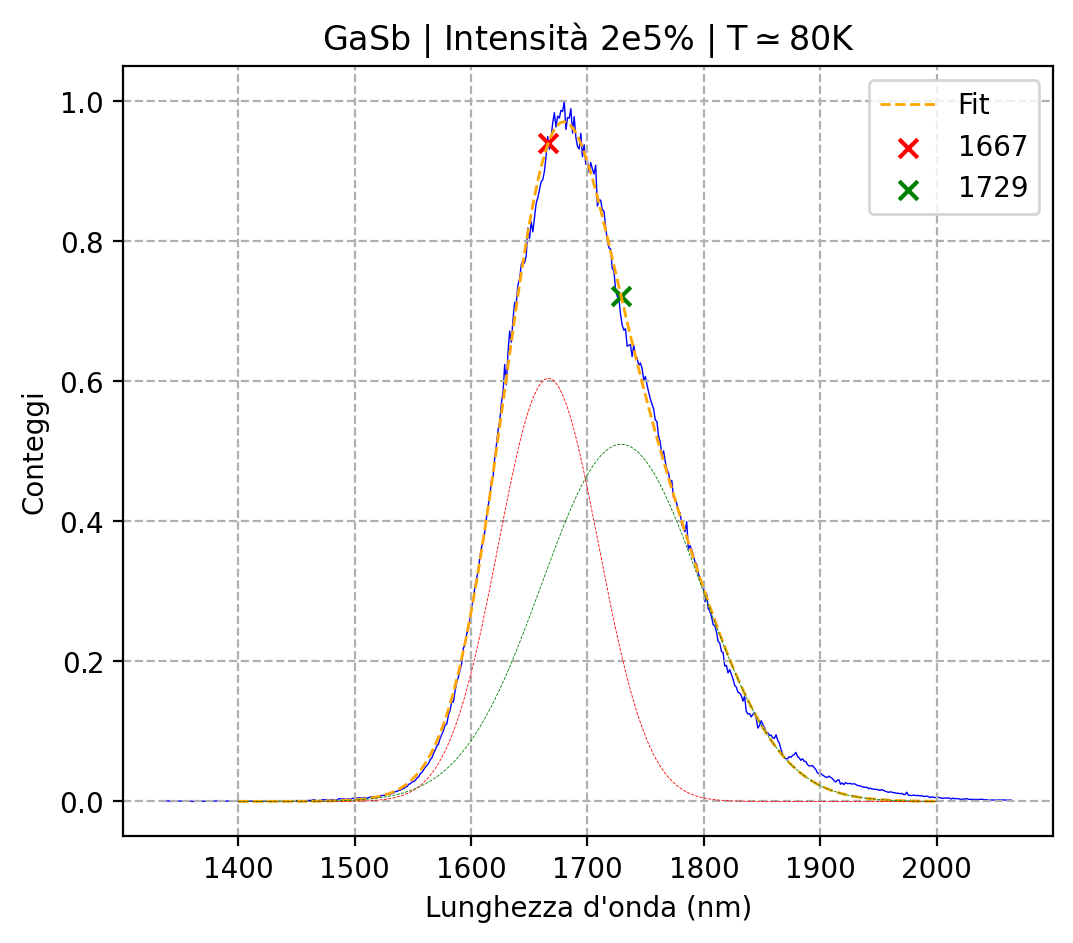

• Gaussiana  1
 - A = 0.6043373252502527
 - mu = 1666.5539719089131
 - sigma = 43.0488968767067
• Gaussiana  2
 - A = 0.510189527937943
 - mu = 1728.9425857567746
 - sigma = 68.50364245646372
 - chi2rid = 0.4697474615495801
- - - - - - - - - - - - - - - - - - - - - - - - - -
prevent_overfitting ha RIMOSSO 0 picchi
- - - - - - - - - - - - - - - - - - - - - - - - - -


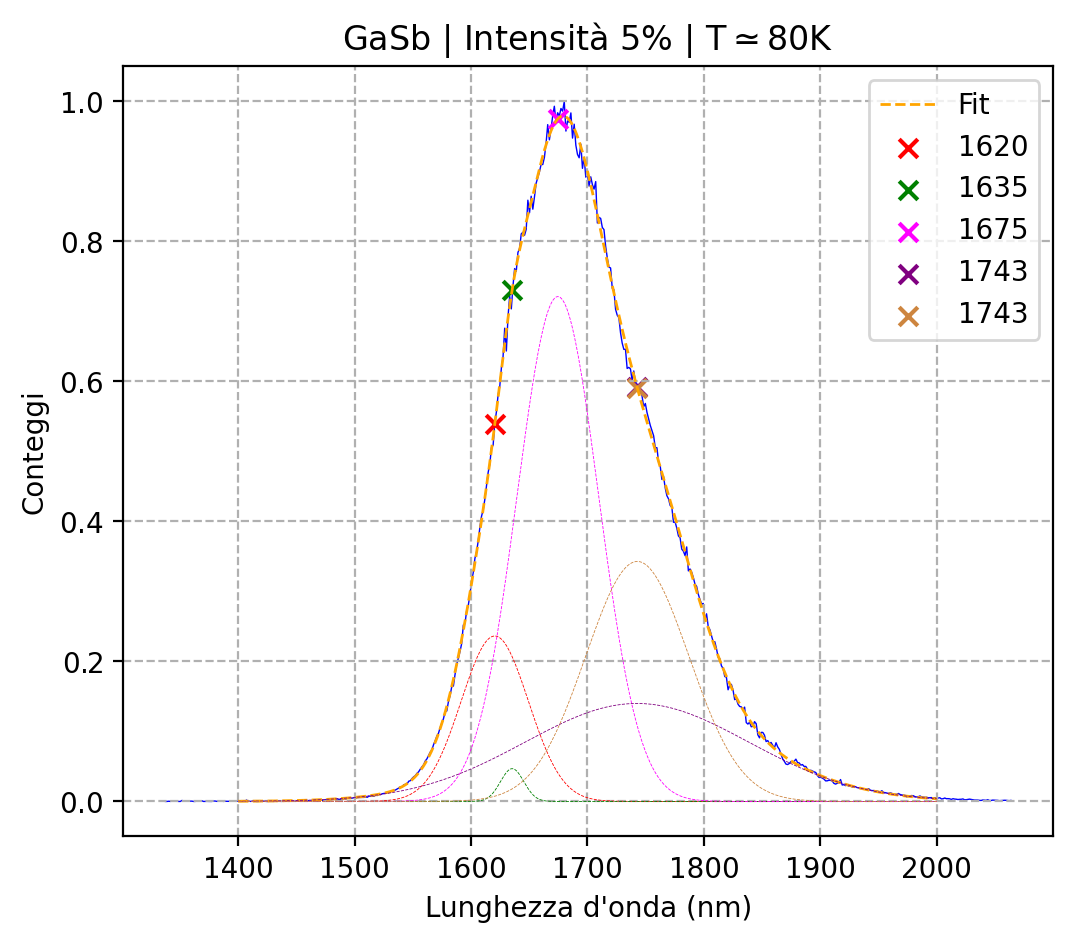

• Gaussiana  1
 - A = 0.34284497359038885
 - mu = 1742.8434277519607
 - sigma = 44.25165060332704
• Gaussiana  2
 - A = 0.13997065978860998
 - mu = 1742.5238312454944
 - sigma = 95.8547322444393
• Gaussiana  3
 - A = 0.23634254739632304
 - mu = 1620.445594787542
 - sigma = 28.861657039502976
• Gaussiana  4
 - A = 0.04683777415697885
 - mu = 1635.3665423856523
 - sigma = 10.000000000000002
• Gaussiana  5
 - A = 0.7212374798567716
 - mu = 1674.5973362659972
 - sigma = 34.98127581999777
 - chi2rid = inf
- - - - - - - - - - - - - - - - - - - - - - - - - -
prevent_overfitting ha RIMOSSO 0 picchi
- - - - - - - - - - - - - - - - - - - - - - - - - -


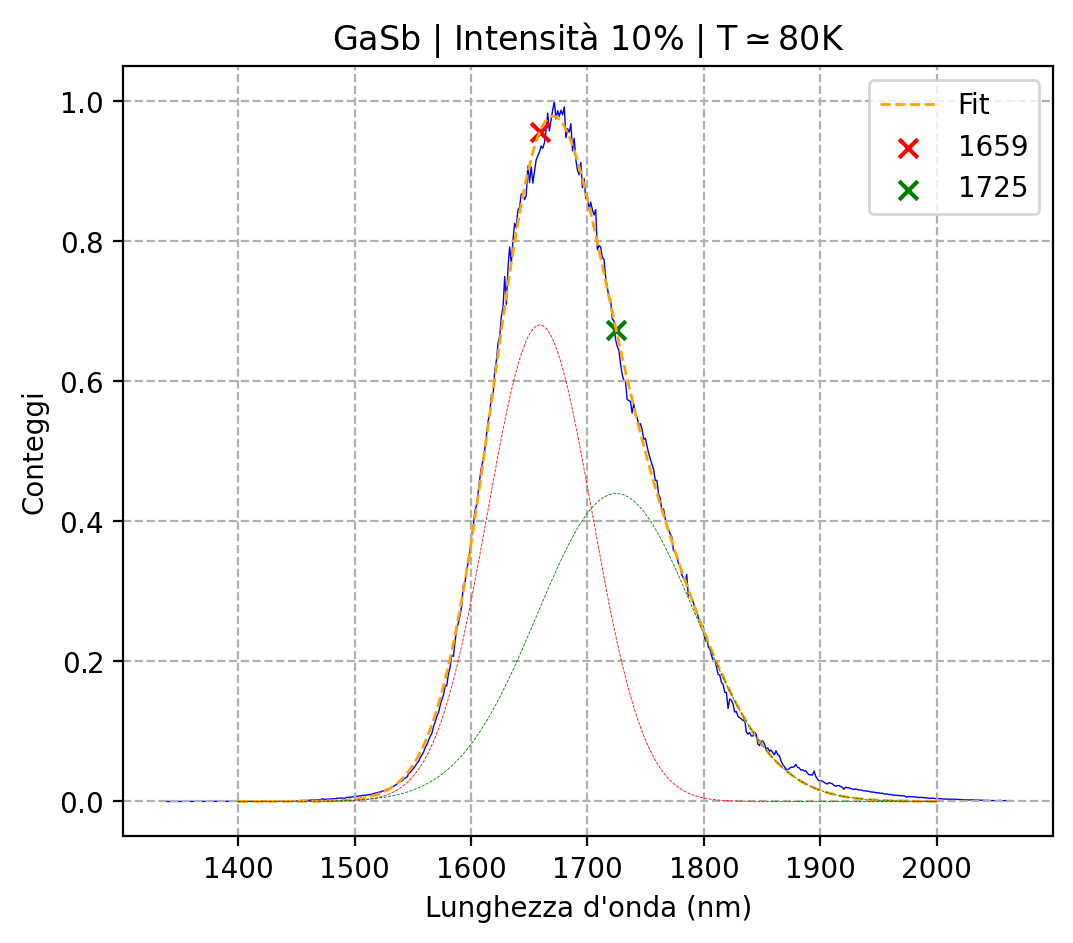

• Gaussiana  1
 - A = 0.6806893009004465
 - mu = 1659.0895477321878
 - sigma = 44.845387521477456
• Gaussiana  2
 - A = 0.4399264382806325
 - mu = 1724.7370200191888
 - sigma = 67.97824699984294
 - chi2rid = 0.4093790968370384
- - - - - - - - - - - - - - - - - - - - - - - - - -
prevent_overfitting ha RIMOSSO 0 picchi
- - - - - - - - - - - - - - - - - - - - - - - - - -


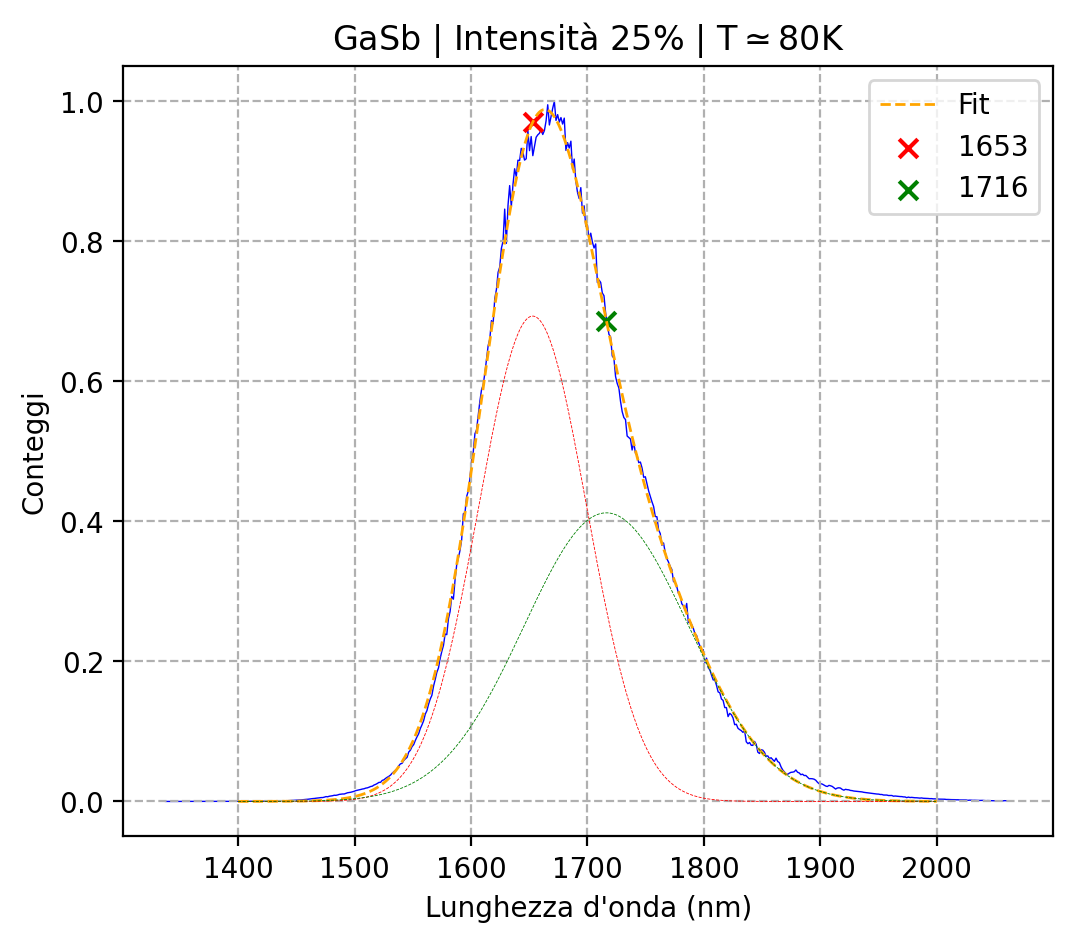

• Gaussiana  1
 - A = 0.41231564526644077
 - mu = 1716.2479421364446
 - sigma = 70.87187687409349
• Gaussiana  2
 - A = 0.6933828775985635
 - mu = 1652.9980345169859
 - sigma = 46.444810984765994
 - chi2rid = 0.3698326318944738


In [234]:
for filtro in arr_filtro:
    
    waveln = GaSb_flt[filtro][0]
    counts = GaSb_flt[filtro][1]
    
    # normalizzo i counts
    maximum = np.max(counts)
    counts = counts / maximum

    # Plot
    plt.figure(figsize=(6,5), dpi=200)
    plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5, zorder=1)
    
    ## FIT ##
    
    # isolo regione 1400 < x < 2000
    mask = (waveln > 1400) & (waveln < 2000)
    x_fit = waveln[mask]
    y_fit = counts[mask]
    
    # impostazione parametri: ogni entrata è una tripla (a, mu, sigma)
    params = [
        (1, 1700, 50)
    ]
    
    # Set dei bounds
    low = [0, 1500, 10] * len(params)  # Es: A >= 0, mu >= 1500, sigma >= 10
    upp = [1, 1900, 200] * len(params)  # Limiti superiori
    
    popt, pcov, chi2_reduced = fit_N_gaussiane(x_fit, y_fit, params, bounds=(low,upp))
        
    ## PLOT CURVA FIT ##
    x_plot = np.linspace(1400, 2000, 500)
    y_plot = N_gaussiane(x_plot, *popt)
    plt.plot(x_plot, y_plot, linestyle='--', color='orange', label=f"Fit", linewidth=1, zorder=2)
        
    # estraggo da popt i parametri ottimizzati
    valori = [] # inizializzo
    for i in range(0, round(len(popt)/3)):
        valori.append((popt[3*i], popt[3*i+1], popt[3*i+2]))
    # li imposto per la prossima gaussiana
    params = valori
    
    # organizzo i picchi in ordine crescente
    valori = sorted(valori, key=lambda p: float(p[1]))
    n_picchi = len(valori)
    
    # plotto i picchi individuati dal fit
    for i in range(n_picchi): 
        x_picco = valori[i][1]
        y_picco = N_gaussiane(x_picco, *popt)
        plt.scatter(x_picco, y_picco, 
                    color=col[i], marker='x',
                    label=str(round(x_picco)), # stampa nel plot le lambda dei picchi
                    s=45, #alpha=0-1 per opacità
                    #zorder=3
                    )
    
    # plotto singolarmente le gaussiane
    for i in range(n_picchi):
        y_gauss = gaussiana(x_plot, *valori[i])
        plt.plot(x_plot, y_gauss, linestyle='--', color=col[i], linewidth=0.3, zorder=2)
    
    ## OPZIONI GRAFICHE ##
    plt.title(r'GaSb | Intensità ' + filtro + '% | T$\simeq80$K')
    plt.xlabel("Lunghezza d'onda (nm)")
    plt.ylabel("Conteggi")
    plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    
    
    ## PRINT RISULTATI FIT ##
    for i in range(0, round(len(popt)/3)):
        print('• Gaussiana ', i+1)
        print(' - A =', popt[3*i])
        print(' - mu =', popt[3*i+1])
        print(' - sigma =', popt[3*i+2])
    print(' - chi2rid =', chi2_reduced)

---

---

## GaSb: filtro=0e5pc su TEMPERATURA

#### Contenitore per i dati

In [235]:
# dictionary GaSb
# le keys saranno i filtri
# ciascuna key conterrà le due colonne del file:
# GaSb[filtro][0] - colonna 0 del file (lunghezze d'onda)
# GaSb[filtro][1] - colonna 1 del file (counts)

GaSb_T = {}

In [236]:
# dictionary per i picchi
GaSb_T_peaks = {}

#### Lettura file e estrazione del massimo dei count

In [237]:
lista_dei_massimi = []

In [238]:
for T in arr_T:
    
    # Costruisco nome file
    name = build_name_GaSb (T=T)
    # Estraggo i dati 
    waveln, counts = leggi_file_asc (name)
    # Pulisco i counts da valori insensati
    counts = clean_counts (counts, peak=True)
    # Raccolgo
    GaSb_T[T] = (waveln, counts)
    
    lista_dei_massimi.append(np.max(counts))

In [239]:
conteggio_massimo_assoluto = np.max(np.array(lista_dei_massimi))

#### Plot su temperatura

In [240]:
# senza err_counts, funziona bene con n_acq=16
n_acq = 1

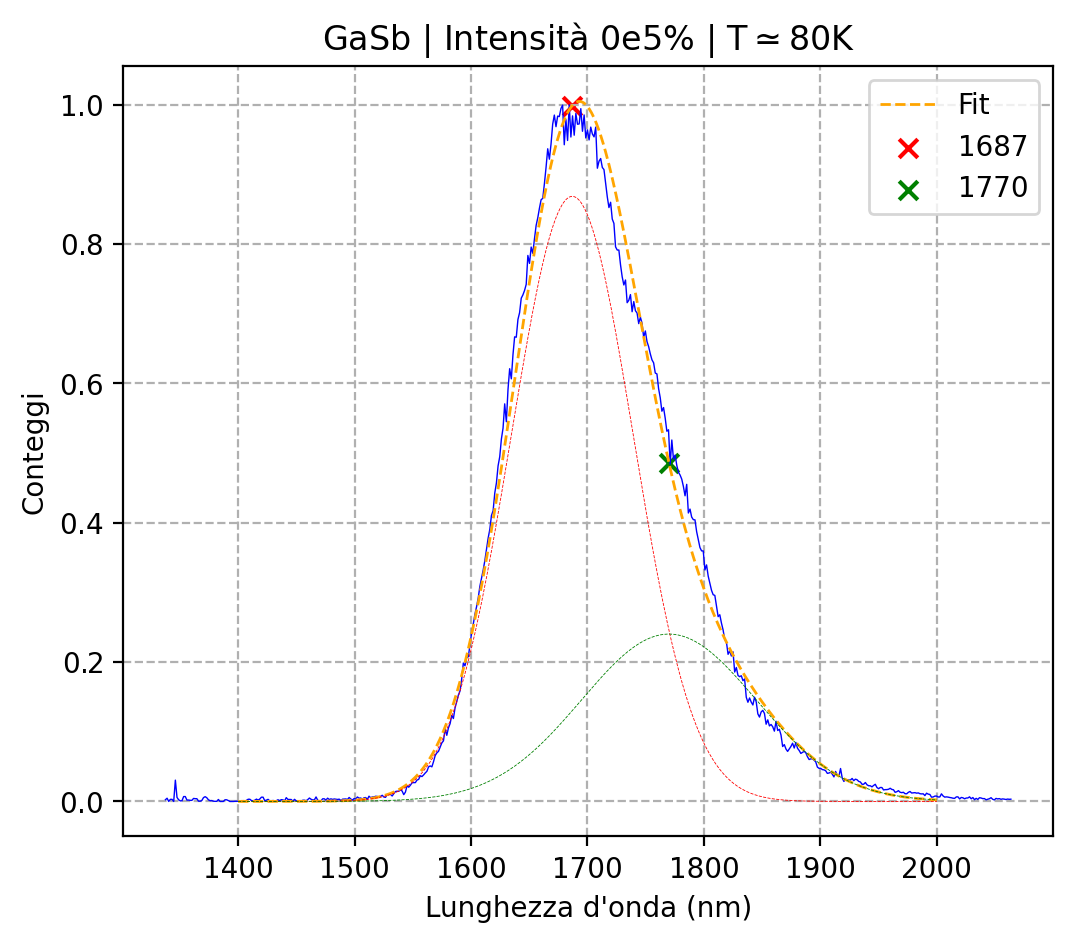

• Gaussiana  1
 - A = 0.8685641974810867
 - mu = 1686.9867230949224
 - sigma = 52.25238413814348
• Gaussiana  2
 - A = 0.24025570652585637
 - mu = 1770.0000000000002
 - sigma = 75.09253492865896
 - chi2rid = 11887.074176202914


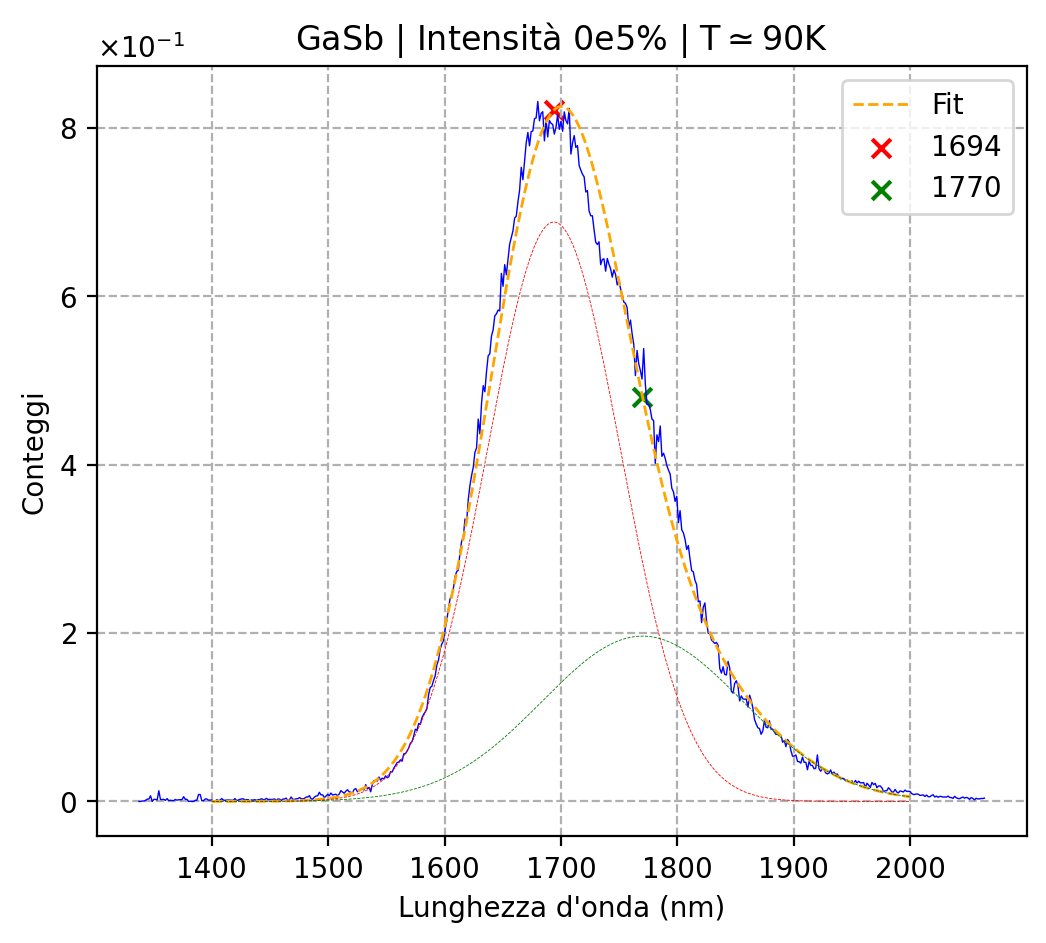

• Gaussiana  1
 - A = 0.6882381214068184
 - mu = 1693.9720973005656
 - sigma = 57.18640400500957
• Gaussiana  2
 - A = 0.19637149931274853
 - mu = 1770.0000000000002
 - sigma = 86.08746671905904
 - chi2rid = 9186.62169446508


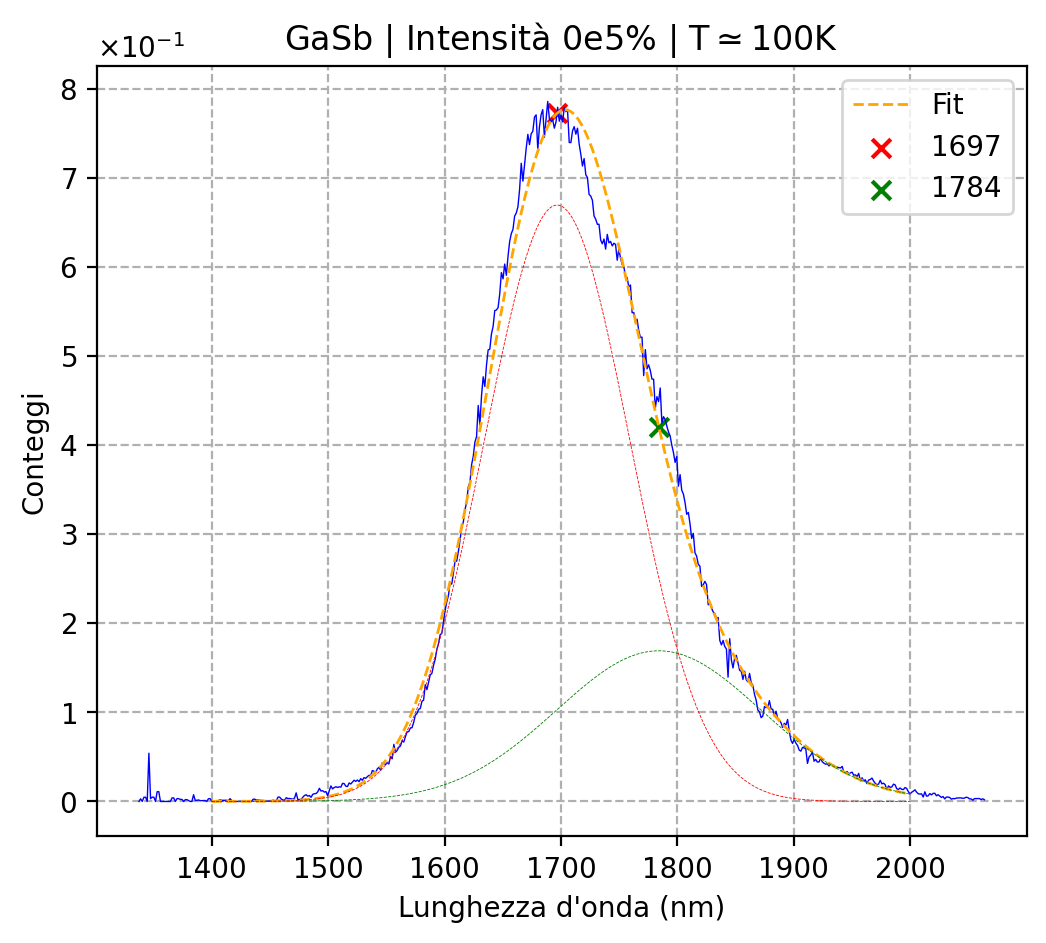

• Gaussiana  1
 - A = 0.6691650709592433
 - mu = 1696.7277282319787
 - sigma = 62.37412541840998
• Gaussiana  2
 - A = 0.16905327686616292
 - mu = 1784.0540801577931
 - sigma = 87.77646186956338
 - chi2rid = 8140.924827213841


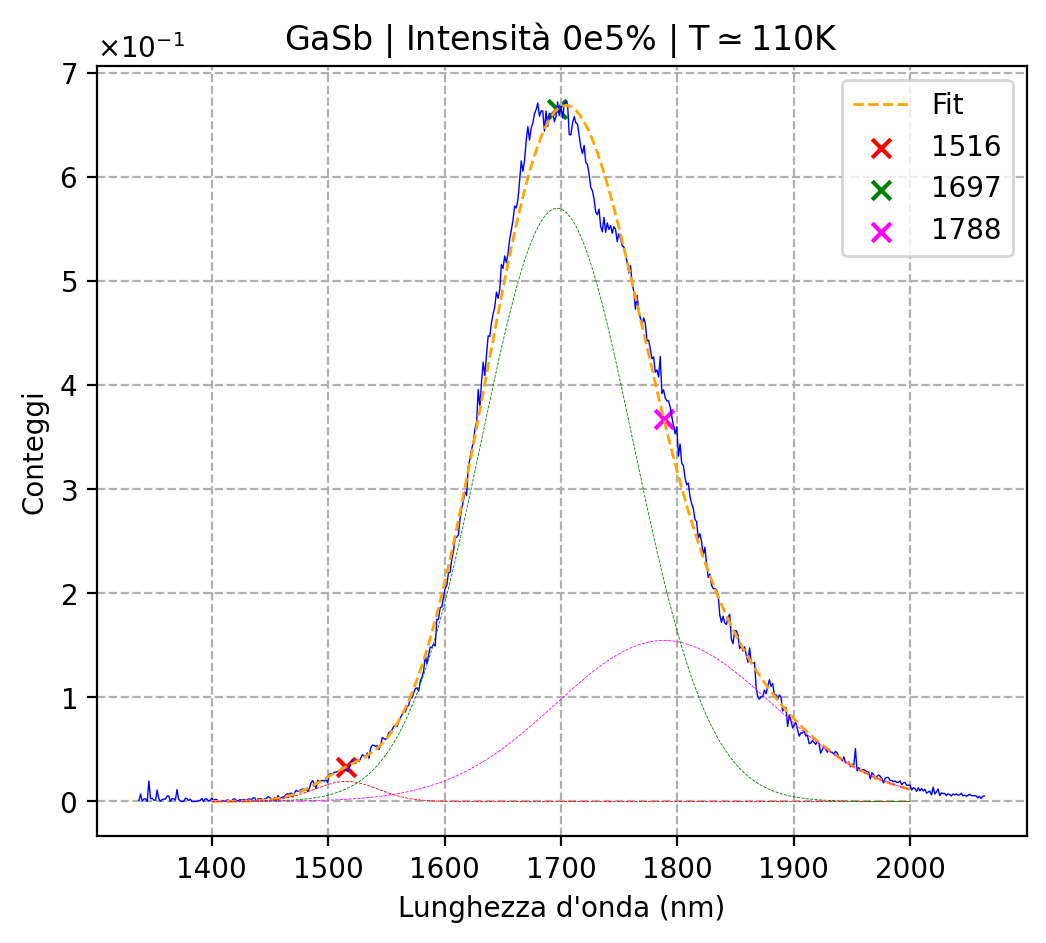

• Gaussiana  1
 - A = 0.019247034576760892
 - mu = 1515.7108019305565
 - sigma = 27.494954243999732
• Gaussiana  2
 - A = 0.5700620523243697
 - mu = 1696.7375756639092
 - sigma = 65.24795198761385
• Gaussiana  3
 - A = 0.15474349512288307
 - mu = 1788.4308698417547
 - sigma = 92.87568515681316
 - chi2rid = 4710.822915831508


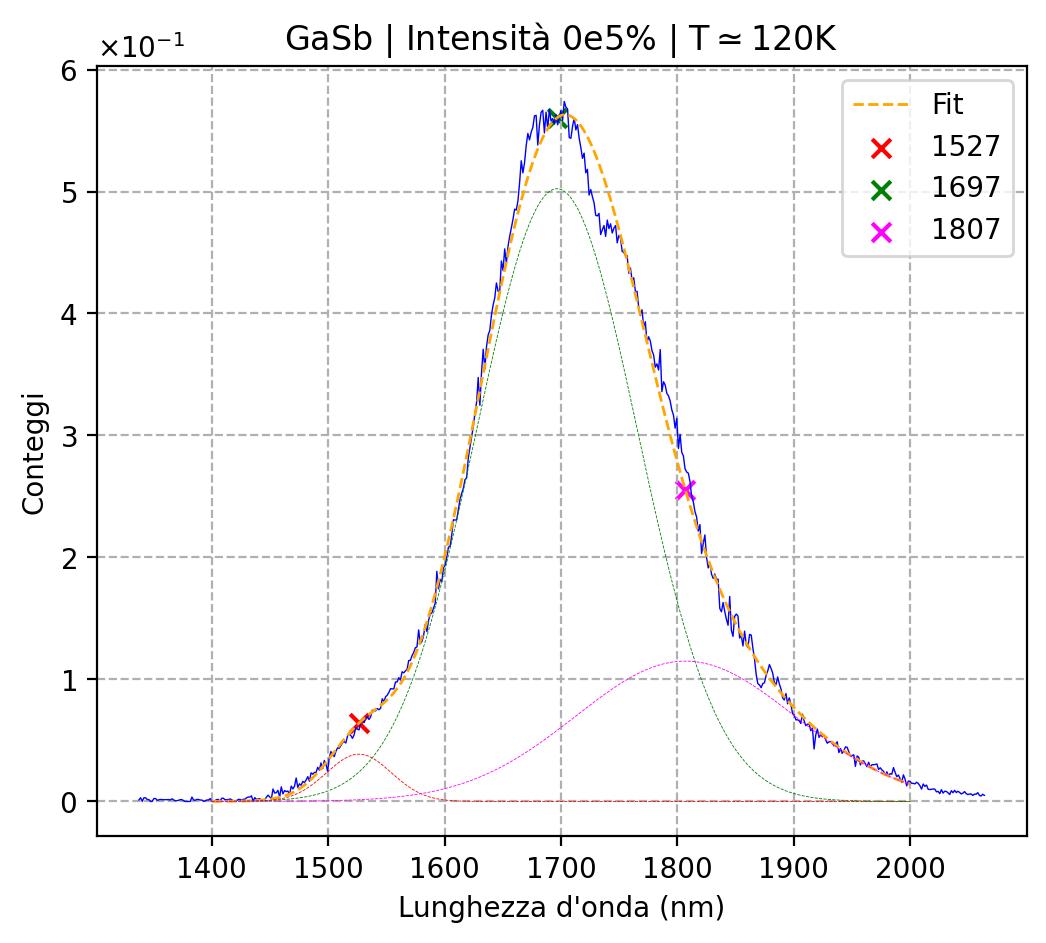

• Gaussiana  1
 - A = 0.03874479073022316
 - mu = 1526.528799007688
 - sigma = 27.900569009626874
• Gaussiana  2
 - A = 0.5022715118476112
 - mu = 1696.577547382735
 - sigma = 69.00386629842212
• Gaussiana  3
 - A = 0.11503337416567873
 - mu = 1806.7653215095306
 - sigma = 94.35374800555468
 - chi2rid = 4836.509689899543


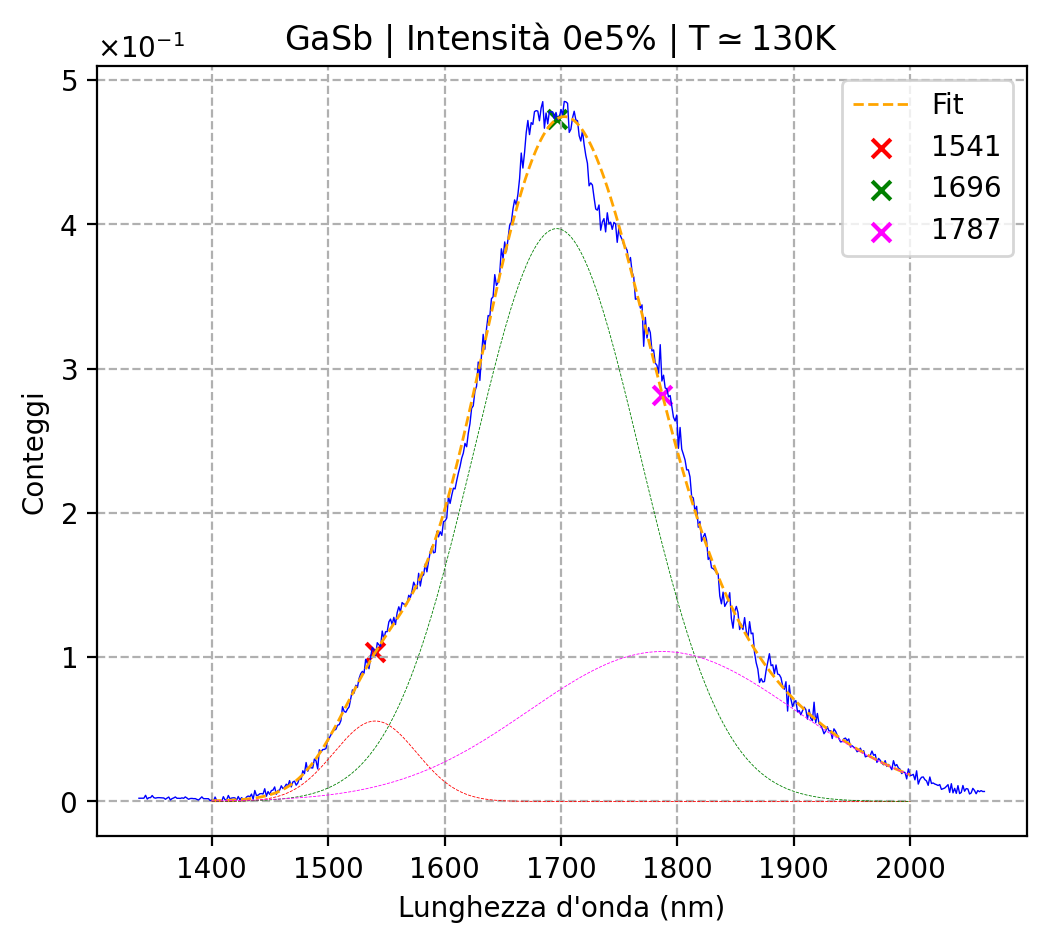

• Gaussiana  1
 - A = 0.055735924671723794
 - mu = 1540.522024425311
 - sigma = 35.55906678631837
• Gaussiana  2
 - A = 0.3970538790712524
 - mu = 1696.3091795536614
 - sigma = 71.64101864793253
• Gaussiana  3
 - A = 0.10391989079124639
 - mu = 1787.0508635700692
 - sigma = 114.453928415214
 - chi2rid = 2582.809106729575


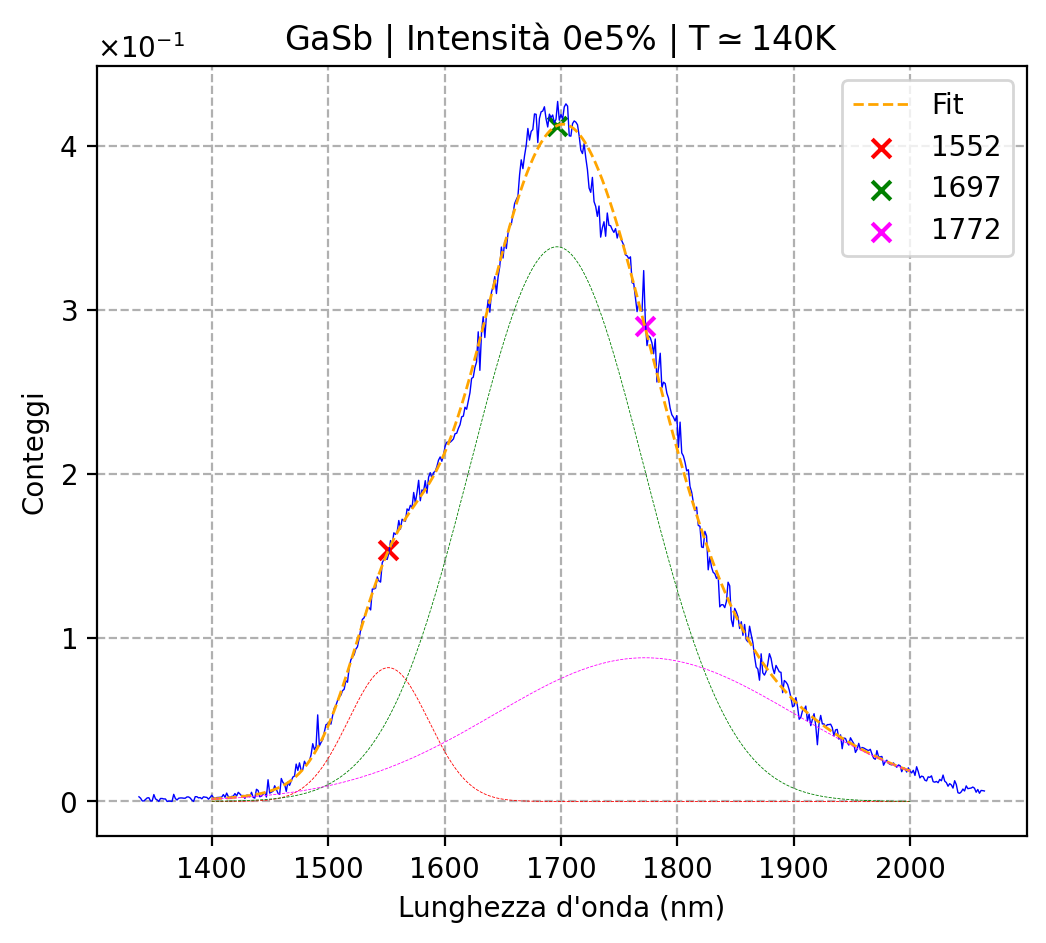

• Gaussiana  1
 - A = 0.08159565054627779
 - mu = 1551.8378049474957
 - sigma = 34.4042961766757
• Gaussiana  2
 - A = 0.33833403845331067
 - mu = 1696.5431570613143
 - sigma = 74.3851881544205
• Gaussiana  3
 - A = 0.08764627543624183
 - mu = 1772.0715929043029
 - sigma = 129.1424404880295
 - chi2rid = 2292.253184971732


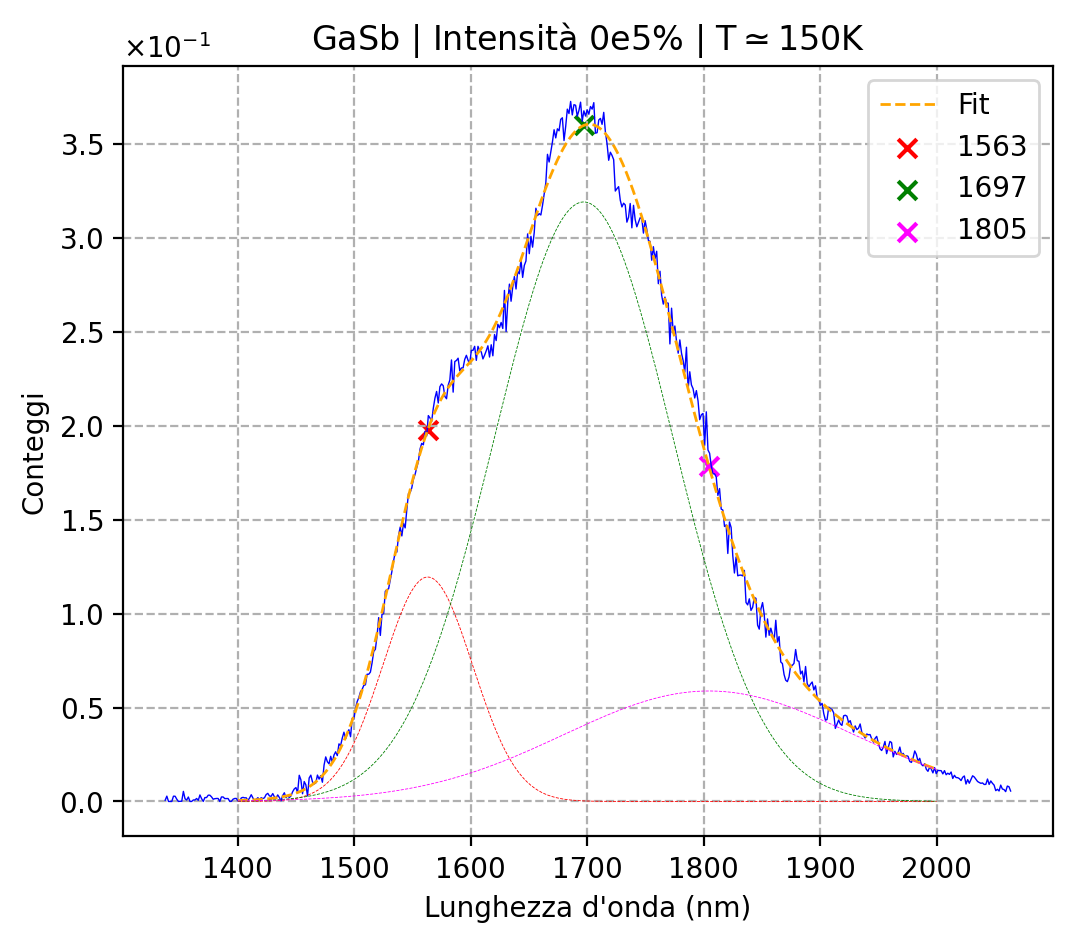

• Gaussiana  1
 - A = 0.11948250038020235
 - mu = 1563.079785485932
 - sigma = 38.604521587244534
• Gaussiana  2
 - A = 0.31922642190669626
 - mu = 1697.0337356827054
 - sigma = 76.7220310629547
• Gaussiana  3
 - A = 0.05882027626855723
 - mu = 1804.503525924901
 - sigma = 124.26183652481352
 - chi2rid = 2331.7195316508537


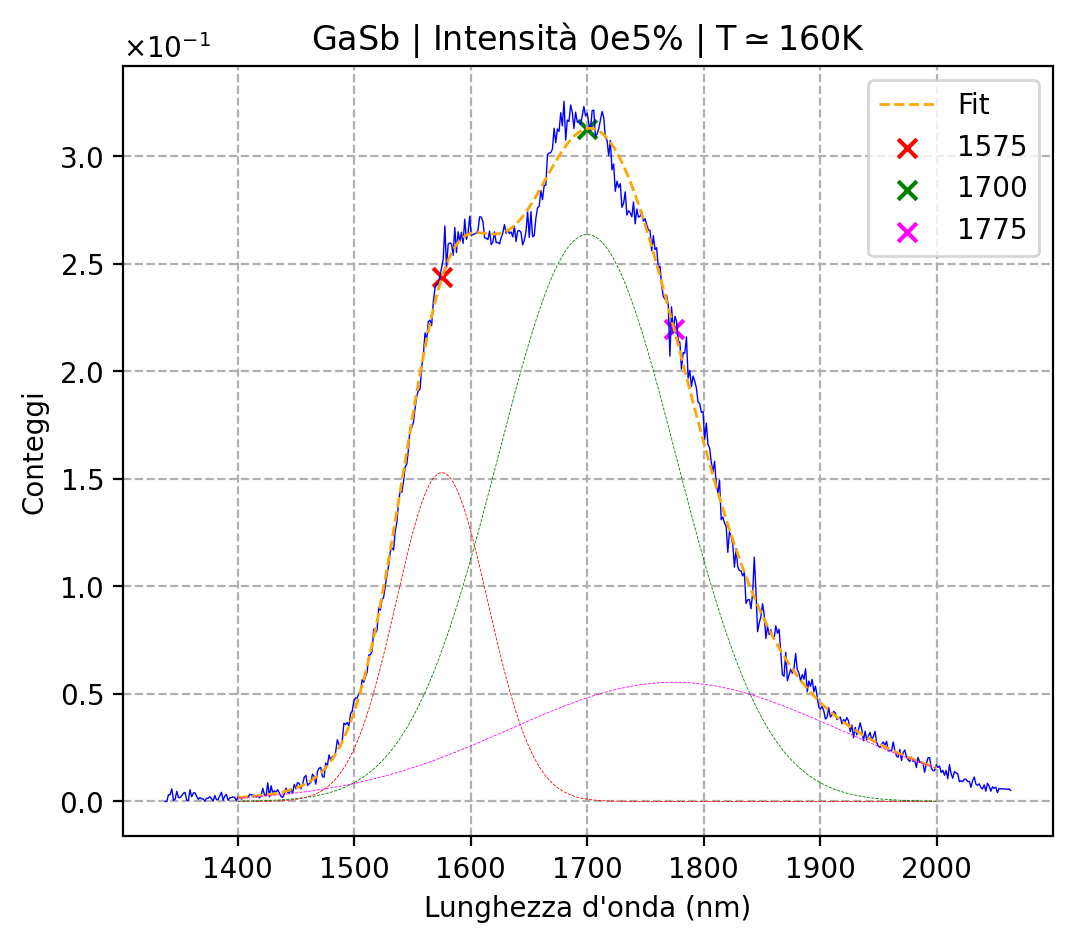

• Gaussiana  1
 - A = 0.152930406751418
 - mu = 1575.2870520810322
 - sigma = 39.42289286540003
• Gaussiana  2
 - A = 0.2636687137647722
 - mu = 1699.9845521010845
 - sigma = 76.67626750190061
• Gaussiana  3
 - A = 0.055419712064633274
 - mu = 1774.5704153947654
 - sigma = 141.23923544886733
 - chi2rid = 1664.6141559157836


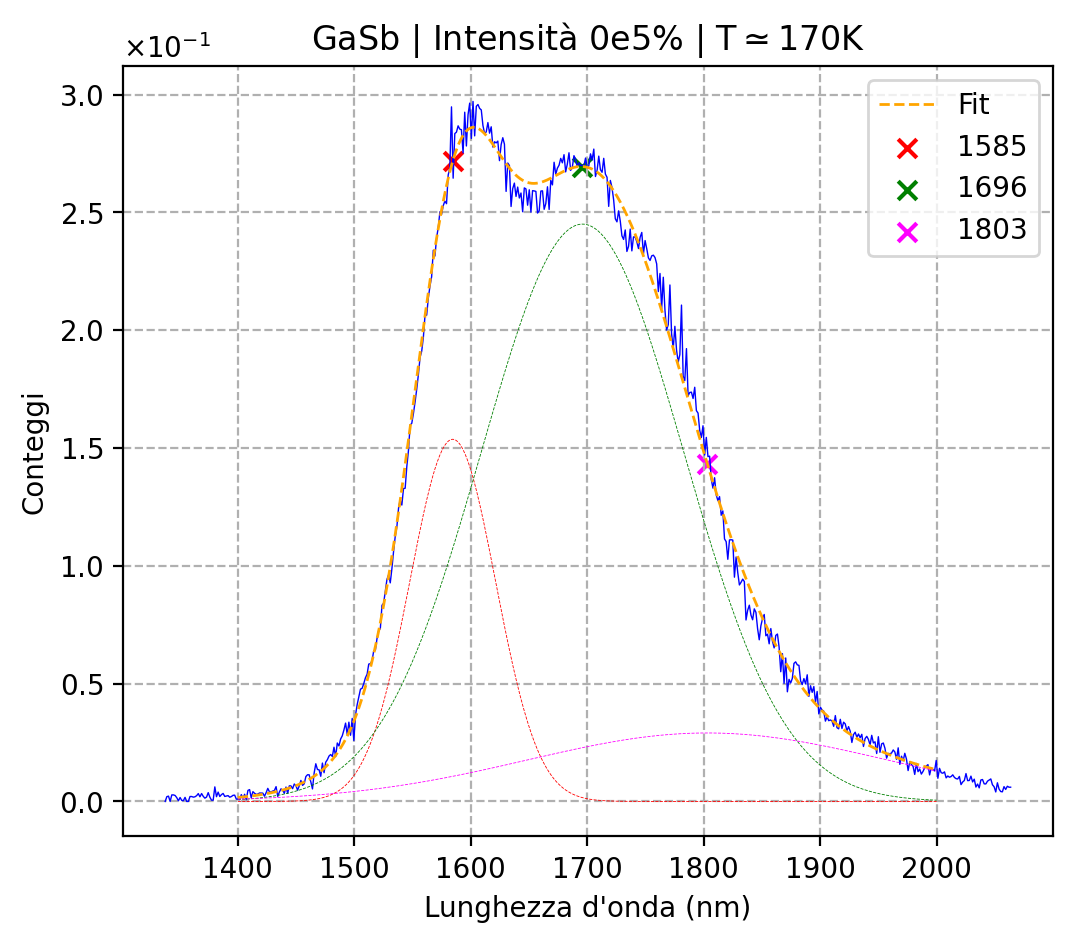

• Gaussiana  1
 - A = 0.15372700152790705
 - mu = 1584.512500977094
 - sigma = 36.9039248675835
• Gaussiana  2
 - A = 0.24506060824672074
 - mu = 1695.9698869102533
 - sigma = 86.75858906155126
• Gaussiana  3
 - A = 0.029068076739789582
 - mu = 1803.2332718451457
 - sigma = 154.41608804805063
 - chi2rid = 1895.3263891810464


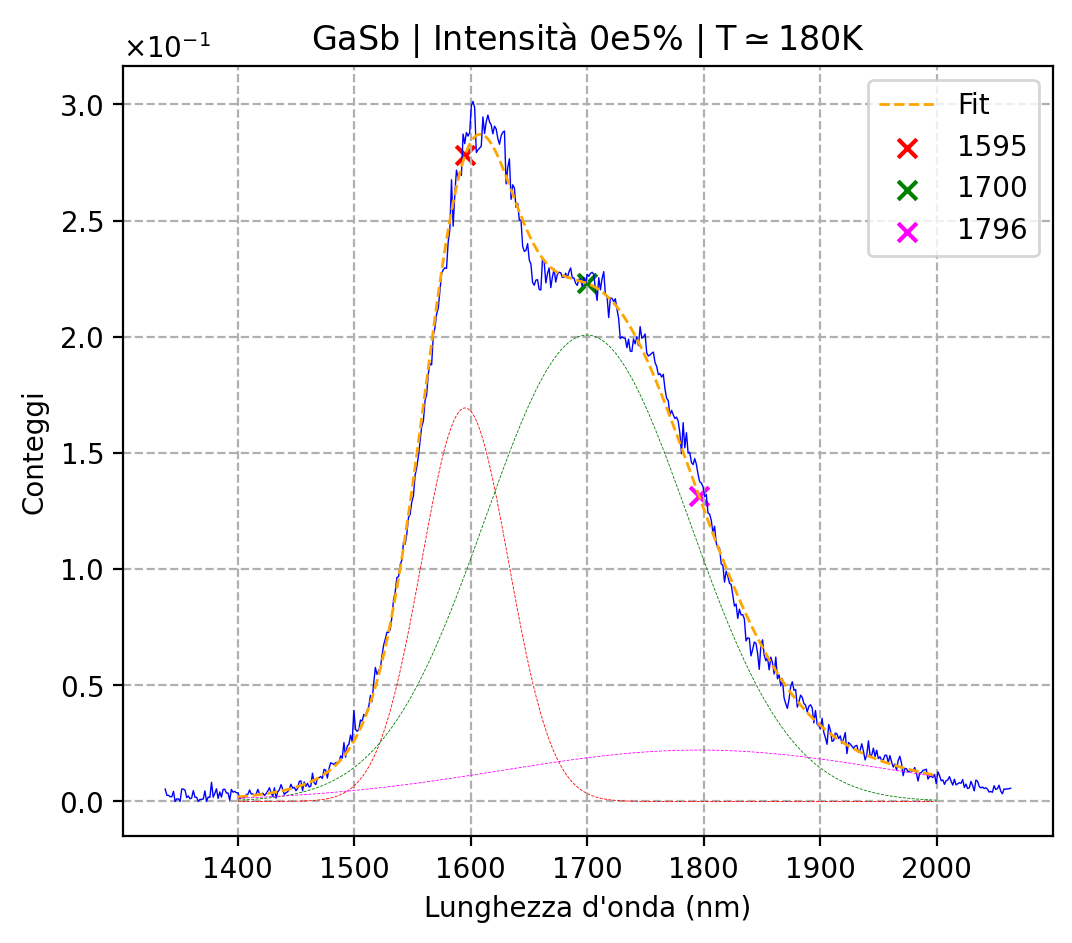

• Gaussiana  1
 - A = 0.16937046298903094
 - mu = 1595.1422659010243
 - sigma = 37.51825701883956
• Gaussiana  2
 - A = 0.20074208221833864
 - mu = 1699.782323250069
 - sigma = 87.34375531326435
• Gaussiana  3
 - A = 0.022120864687119164
 - mu = 1796.0680929793348
 - sigma = 168.52971562907715
 - chi2rid = 1705.6067564262498


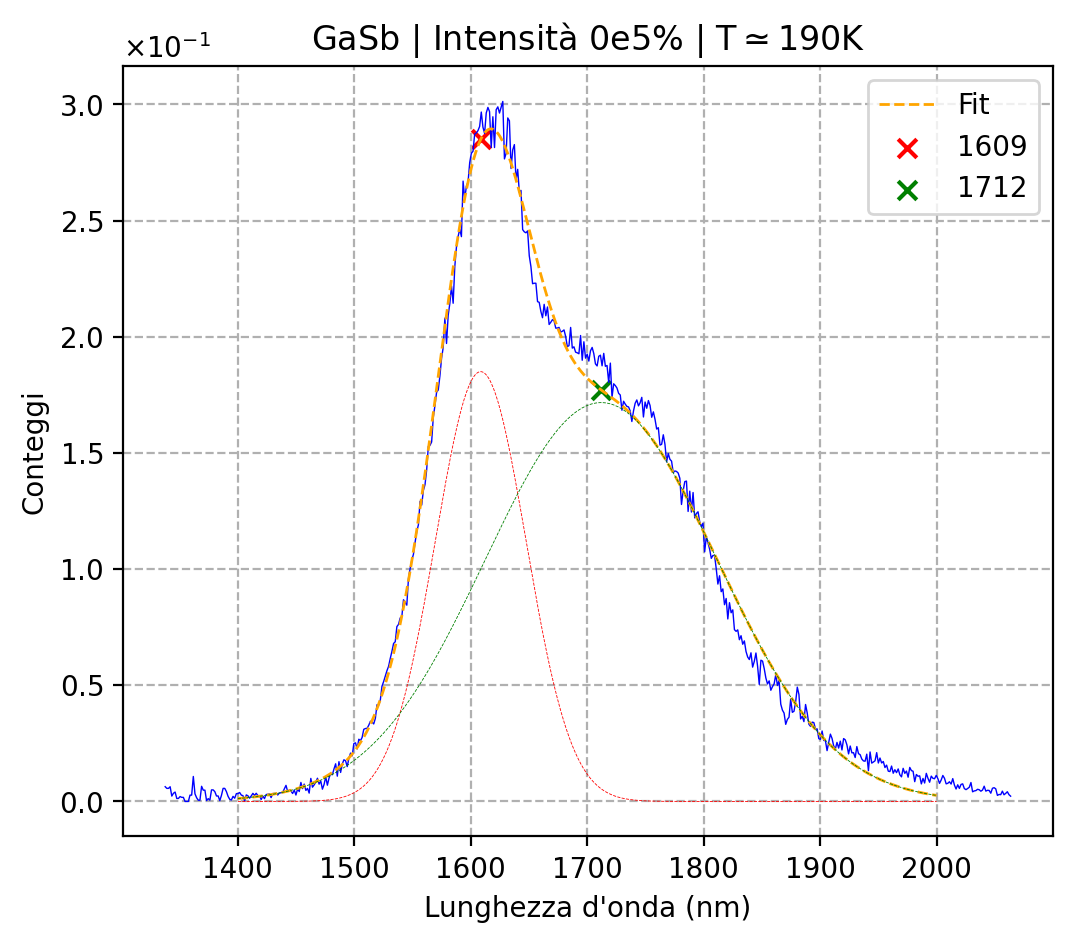

• Gaussiana  1
 - A = 0.18497872775654017
 - mu = 1608.554135351207
 - sigma = 38.95475257213195
• Gaussiana  2
 - A = 0.17165936541562102
 - mu = 1712.0101511946027
 - sigma = 99.47264405465393
 - chi2rid = 5071.687454208713


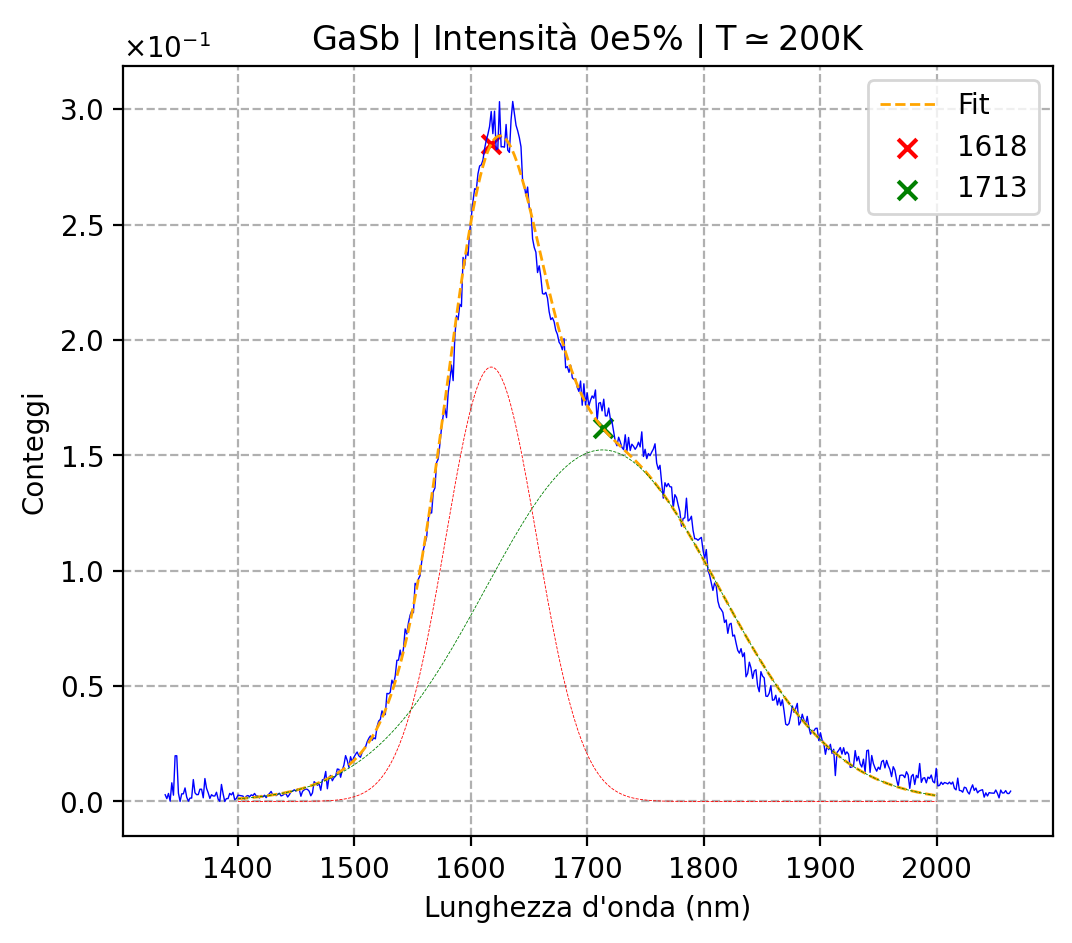

• Gaussiana  1
 - A = 0.1882370032286124
 - mu = 1617.6336117269523
 - sigma = 39.115369122425435
• Gaussiana  2
 - A = 0.1523323939292735
 - mu = 1713.1826964037127
 - sigma = 100.27040729246633
 - chi2rid = 4534.311048370263


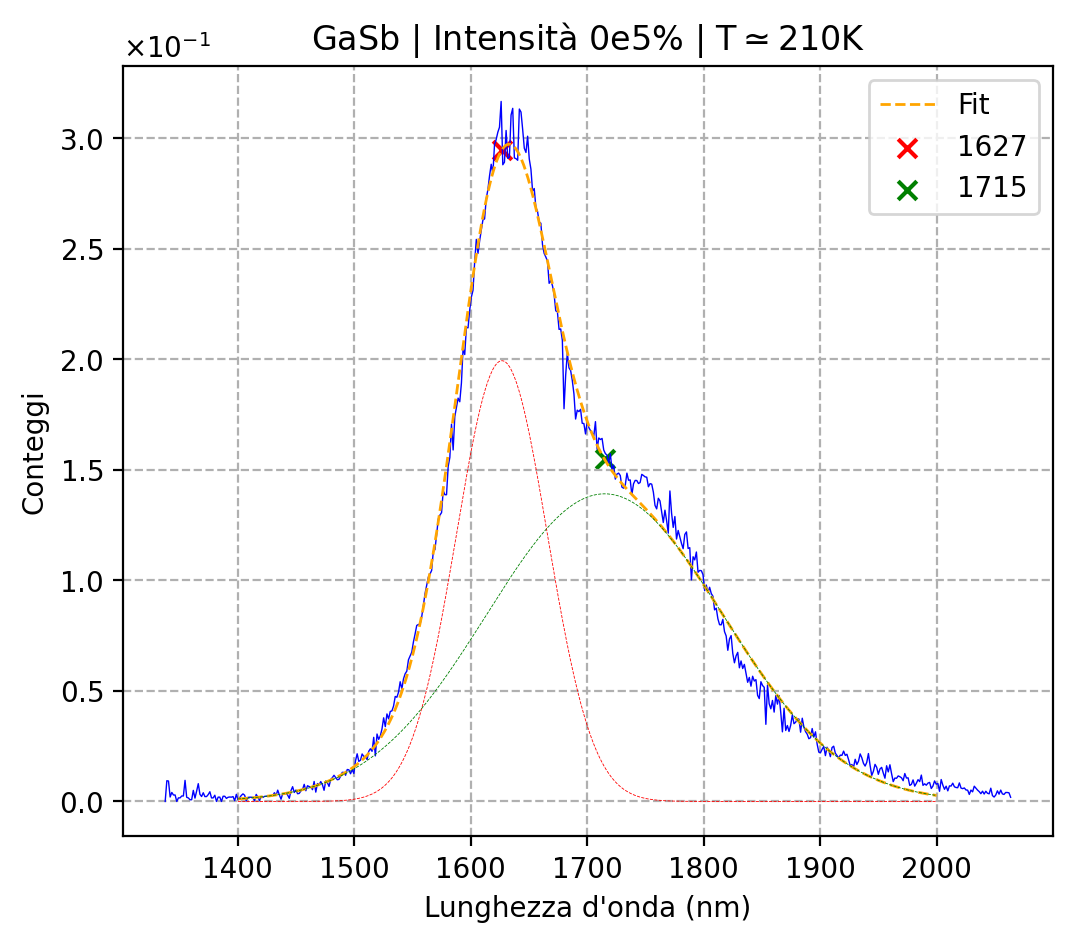

• Gaussiana  1
 - A = 0.19937796763488772
 - mu = 1626.7961754377864
 - sigma = 39.03550556666547
• Gaussiana  2
 - A = 0.13916509500974994
 - mu = 1714.996636960281
 - sigma = 101.55548034194415
 - chi2rid = 4021.00485801489


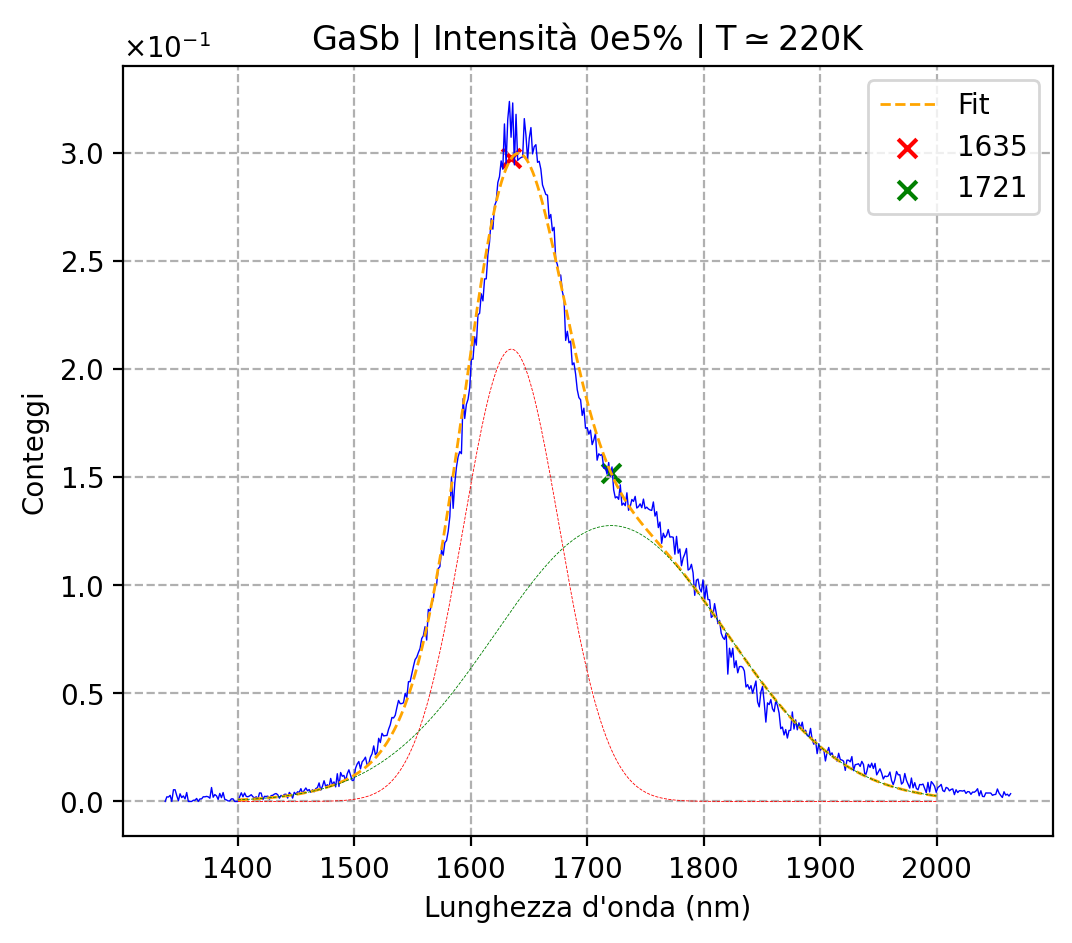

• Gaussiana  1
 - A = 0.2092628630643149
 - mu = 1634.8921332662114
 - sigma = 41.25123372814199
• Gaussiana  2
 - A = 0.1276553688826118
 - mu = 1720.603178720515
 - sigma = 99.8400291018476
 - chi2rid = 5027.508322742166


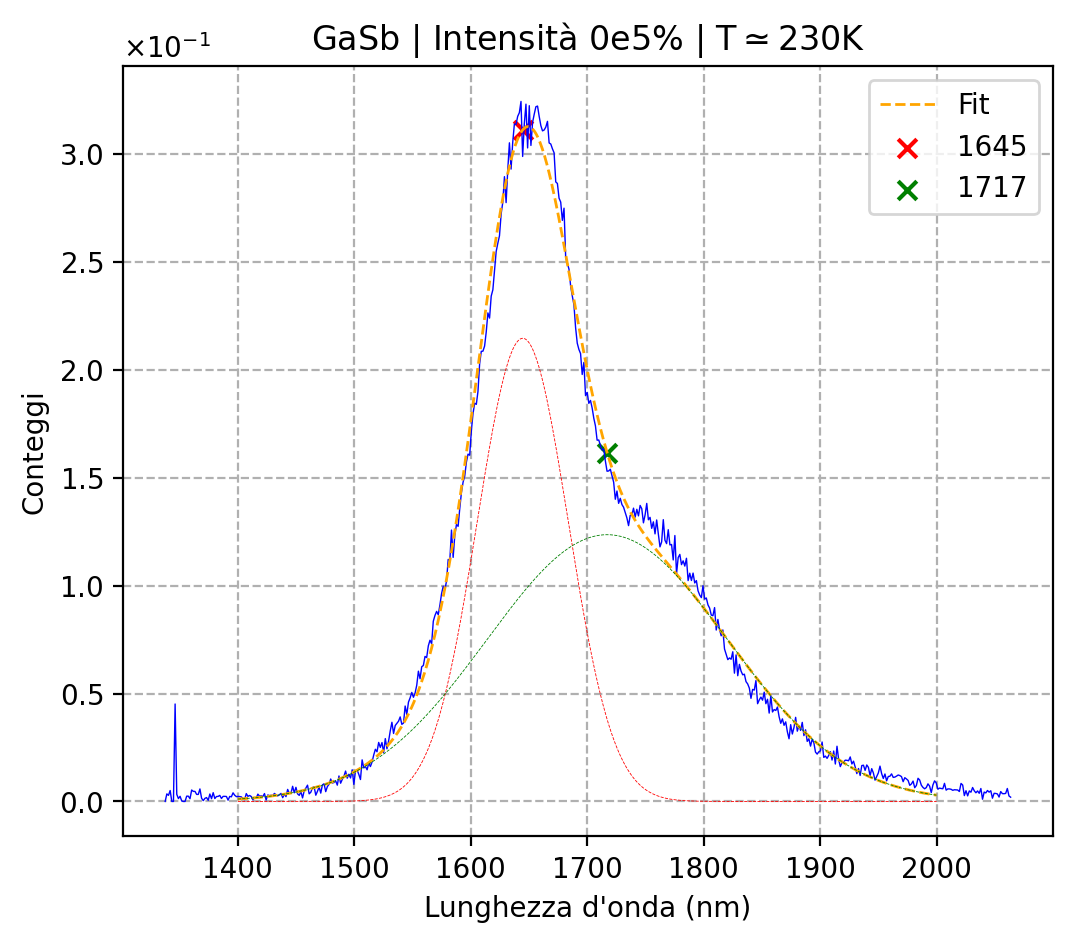

• Gaussiana  1
 - A = 0.21467879471043166
 - mu = 1644.6702957539894
 - sigma = 38.945155960710224
• Gaussiana  2
 - A = 0.12364578882596186
 - mu = 1717.1929755255137
 - sigma = 103.28640535055122
 - chi2rid = 3591.1437389650832


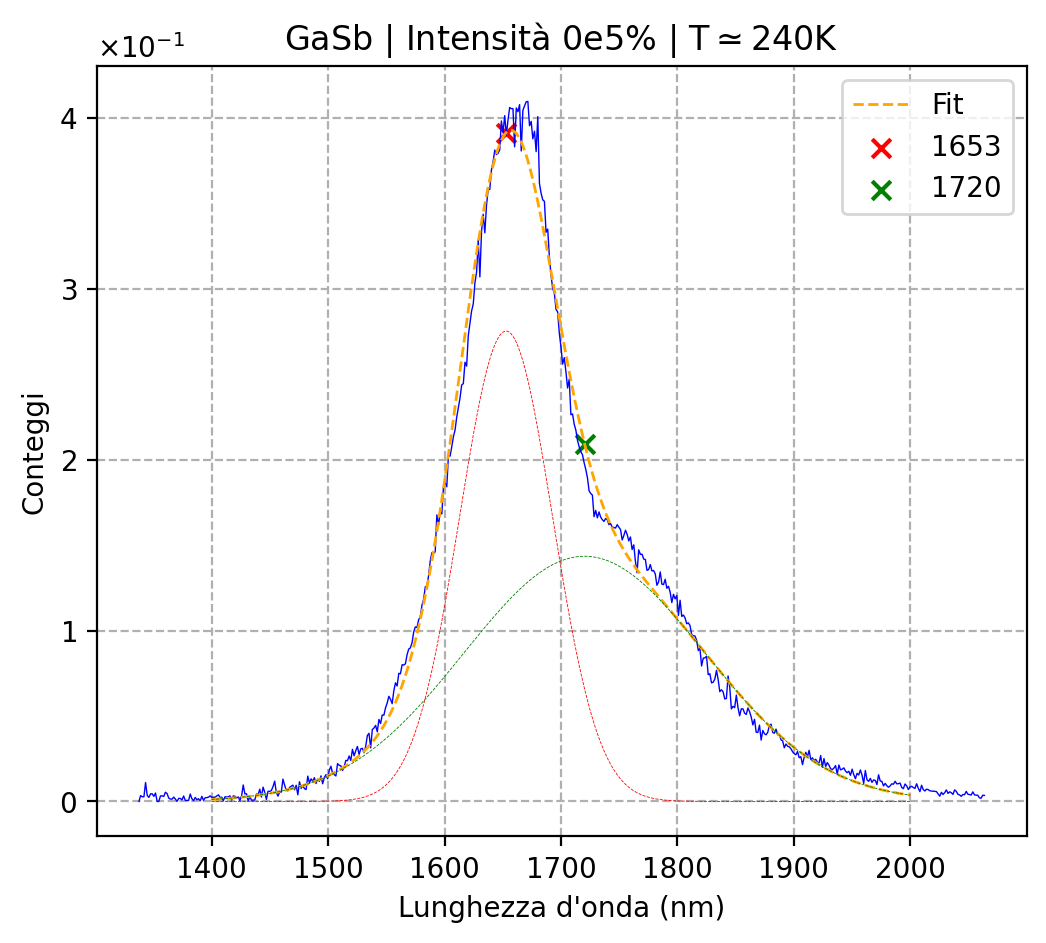

• Gaussiana  1
 - A = 0.27531976552482107
 - mu = 1652.8714116658787
 - sigma = 39.84759606826691
• Gaussiana  2
 - A = 0.14353135517052396
 - mu = 1720.2273085854863
 - sigma = 103.40905550137977
 - chi2rid = 5737.335402715985


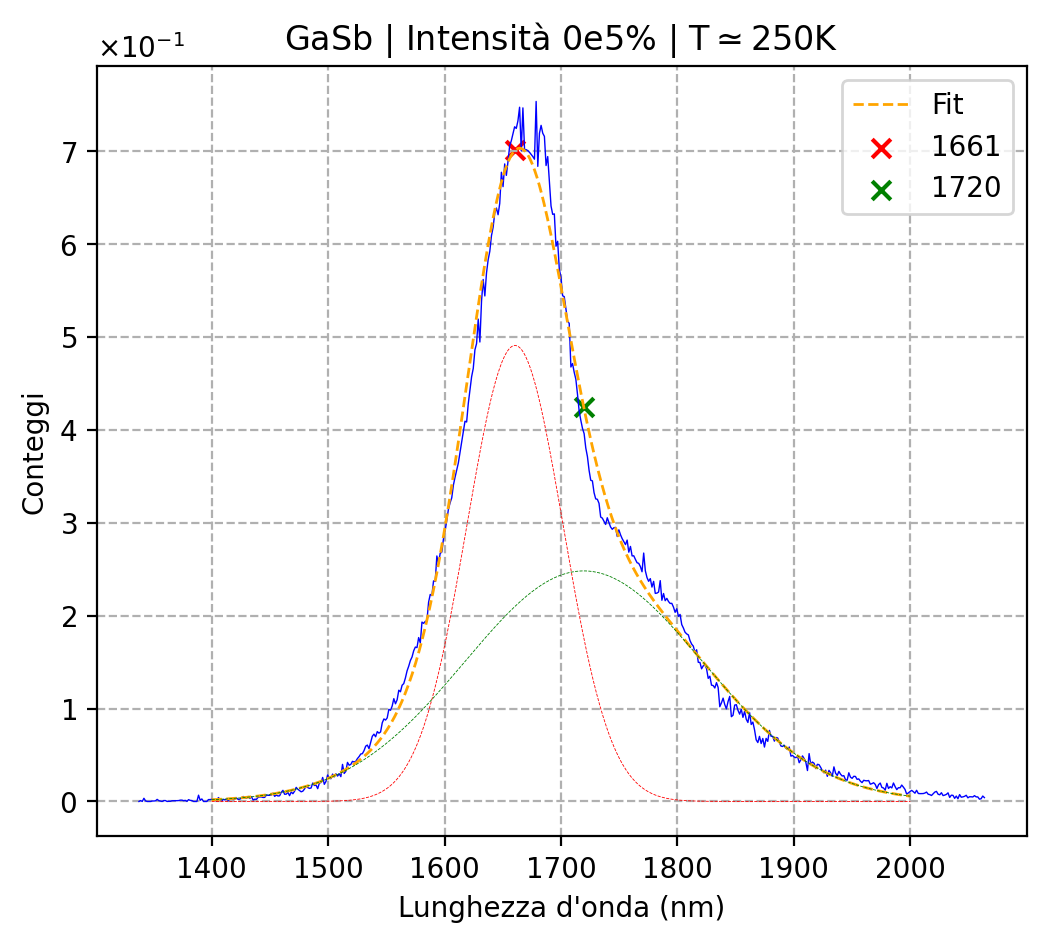

• Gaussiana  1
 - A = 0.49105497946247784
 - mu = 1660.5522458259225
 - sigma = 41.250929702074956
• Gaussiana  2
 - A = 0.24828402693557078
 - mu = 1719.5308246635632
 - sigma = 102.06015514710232
 - chi2rid = 7564.330757950422


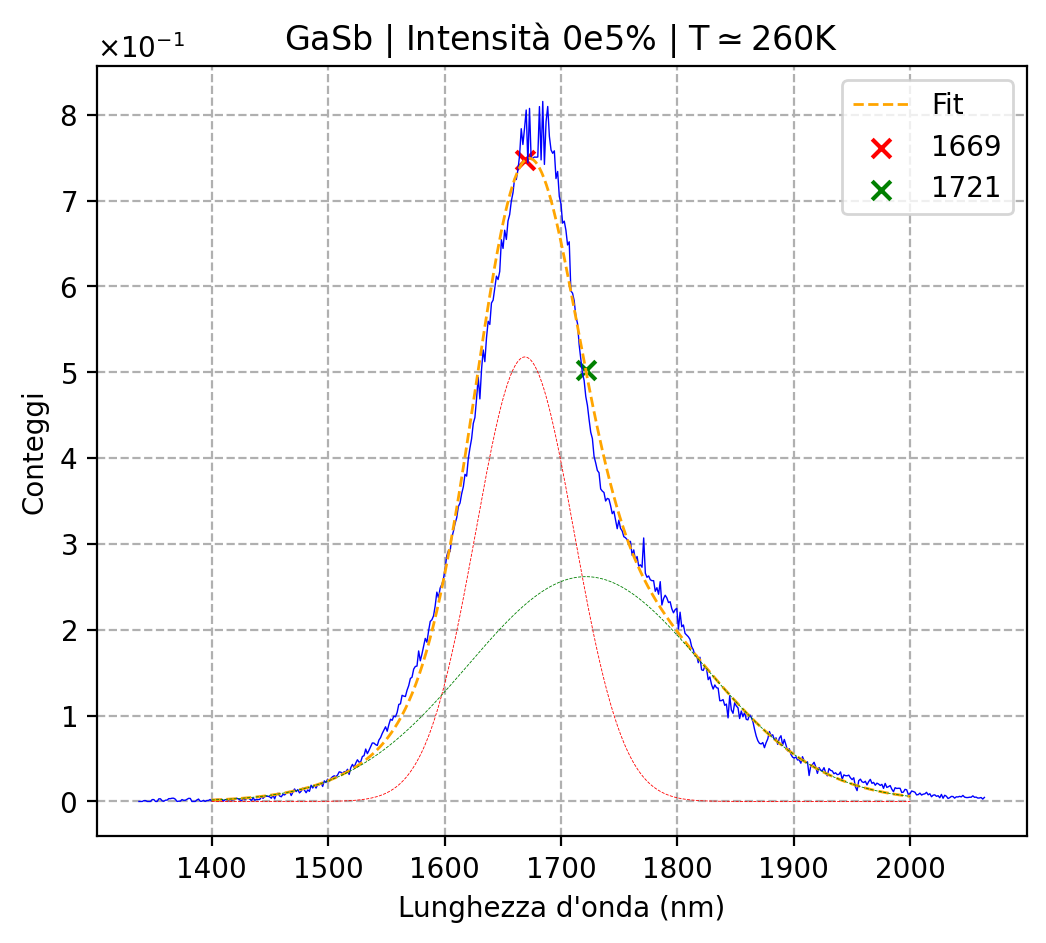

• Gaussiana  1
 - A = 0.5179059915584923
 - mu = 1669.0212049661259
 - sigma = 42.23758453714309
• Gaussiana  2
 - A = 0.26190923340506295
 - mu = 1721.291501992285
 - sigma = 101.11342273174981
 - chi2rid = 8893.160959726452


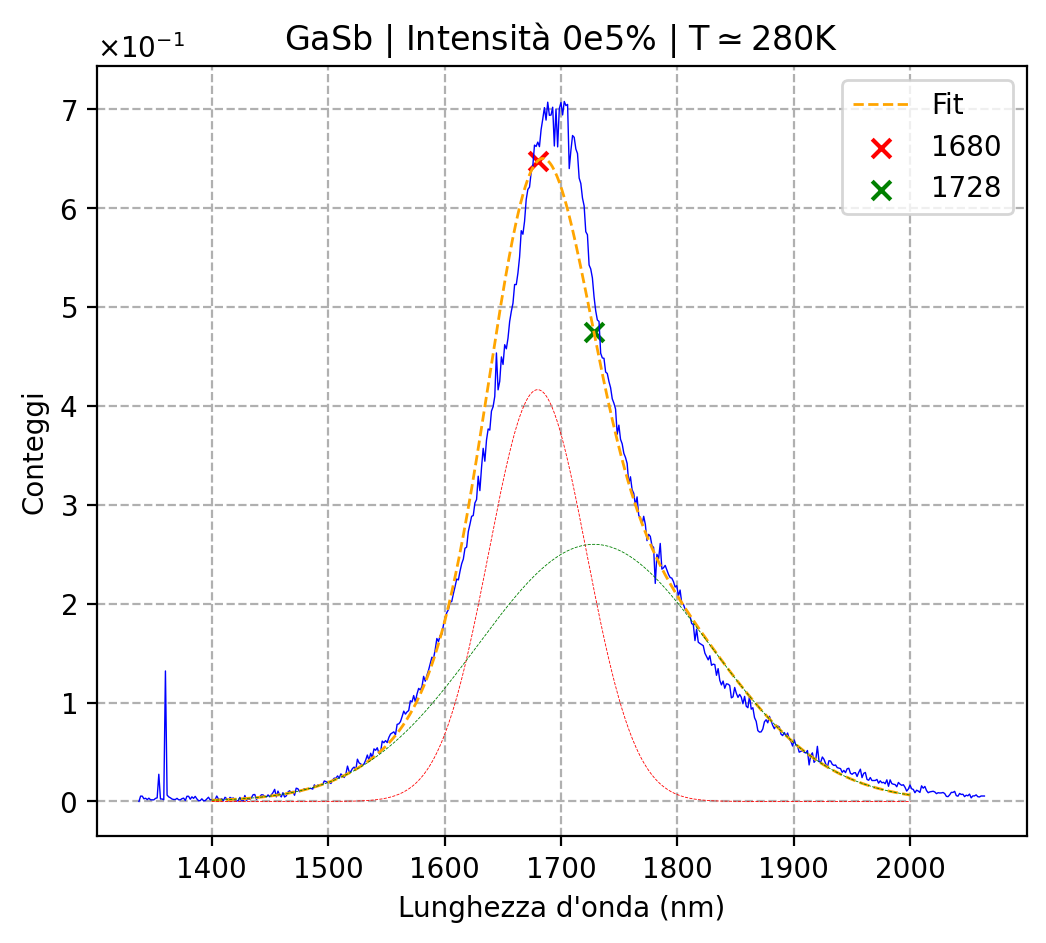

• Gaussiana  1
 - A = 0.4165084240845161
 - mu = 1679.9999999999998
 - sigma = 41.90843288993685
• Gaussiana  2
 - A = 0.26008019361156953
 - mu = 1728.291734622813
 - sigma = 99.95852309885123
 - chi2rid = 11501.127588857618


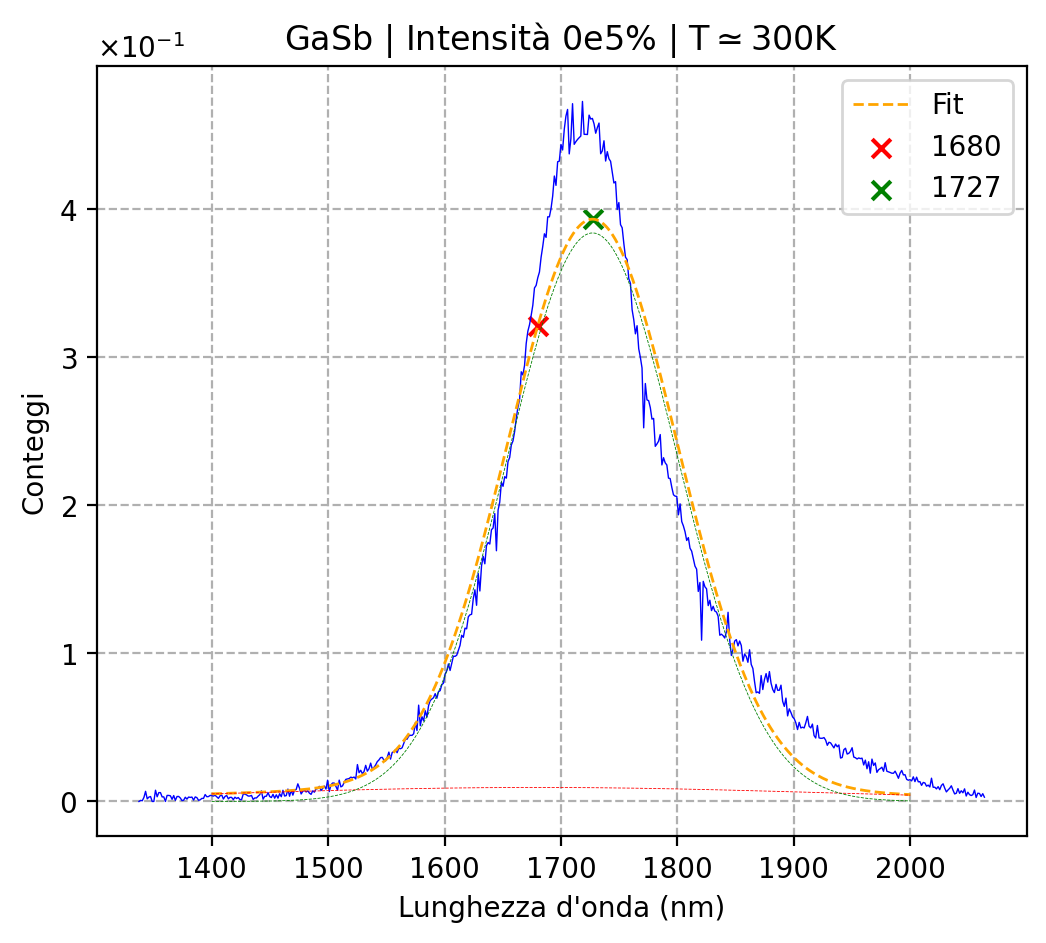

• Gaussiana  1
 - A = 0.009456964074738549
 - mu = 1679.9999999999998
 - sigma = 253.2633985975887
• Gaussiana  2
 - A = 0.38402668486238145
 - mu = 1727.1669768226839
 - sigma = 72.97154580274864
 - chi2rid = 32059.805839274453


In [241]:
# imposto parametri INIZIALI: ogni entrata è una tripla (a, mu, sigma)
params = [
    (1, 1650, 50)
]
# successivamente, ad ogni iterazione i parametri usati sono quelli del fit precedente

for T in arr_T:
    
    waveln = GaSb_T[T][0]
    counts = GaSb_T[T][1]
    
    if T == '78e68':
        T = '80'
    
    ## normalizzo i counts ##
    # creo vettore degli errori sui counts normalizzati (propagando errore)
    counts_sicuro = np.where(counts == 0, 1, counts)  
    err_counts = (np.sqrt(counts_sicuro)/conteggio_massimo_assoluto) / (np.sqrt(40*n_acq)) 
    # sul massimo count del plot attualmente considerato
    '''maximum = np.max(counts)
    counts = counts / maximum'''
    # sul massimo count di tutti i plot
    counts = counts / conteggio_massimo_assoluto 

    # Plot
    plt.figure(figsize=(6,5), dpi=200)
    plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5)#, zorder=1)
    
    ## FIT ##
    
    # isolo regione 1400 < x < 2000
    mask = (waveln > 1400) & (waveln < 2000)
    x_fit = waveln[mask]
    y_fit = counts[mask]
    err_counts = err_counts[mask]
    
    # 'Appiattisco' la lista dei parametri iniziali
    par_flattened = np.array(params).flatten()
    
    # Set dei bounds
    low = [0.01, 1500, 10] * len(params)  # Es: A >= 0, mu >= 1500, sigma >= 10
    upp = [1, 1850, 300] * len(params)  # Limiti superiori
    
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    # HACK: MAGHEGGINI 
    ## prendo il massimo dei counts normalizzati per impostare i bounds di A ##
    massimo_locale = np.max(counts)
    low_A = massimo_locale/50
    upp_A = 2*massimo_locale
    
    if 80 <= int(T) <= 100:
        N_MAX_GAUSS = 2
        params = [
            (low_A, 1670, 50),
            (low_A, 1800, 50)
        ]
        low = [low_A, 1620,   3,  low_A, 1770,   3] 
        upp = [upp_A, 1730, 300,  upp_A, 1830, 300] 
    elif 110 <= int(T) <= 180:
        N_MAX_GAUSS = 3
        params = [
            (low_A, 1540, 50),
            (low_A, 1700, 50),
            (low_A, 1800, 50)
        ]
        low = [low_A, 1500,   3,  low_A, 1670,   3,  low_A, 1770,   3] 
        upp = [upp_A, 1620, 300,  upp_A, 1730, 300,  upp_A, 1830, 300] 
    else: # 190 <= T <= 300:
        N_MAX_GAUSS = 2
        params = [
            (low_A, 1620, 50),
            (low_A, 1730, 50)
        ]
        low = [low_A, 1590,   3,  low_A, 1700,   3] 
        upp = [upp_A, 1680, 300,  upp_A, 1760, 300] 
    # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    
    popt, pcov, chi2_reduced = fit_N_gaussiane(x_fit, y_fit, params, 
                                               bounds=(low,upp), 
                                               N_MAX_GAUSS=N_MAX_GAUSS,
                                               n_acq=n_acq,
                                               err_counts=err_counts,
                                               PREVENT_OVERFIT=False)
    
    
    ## PLOT CURVA FIT ##
    x_plot = np.linspace(1400, 2000, 600)
    y_plot = N_gaussiane(x_plot, *popt)
    plt.plot(x_plot, y_plot, linestyle='--', color='orange', label=f"Fit", linewidth=1)#, zorder=2)
    
    # estraggo da popt i parametri ottimizzati
    valori = [] # inizializzo
    for i in range(0, round(len(popt)/3)):
        valori.append((popt[3*i], popt[3*i+1], popt[3*i+2]))
    # li imposto per la prossima gaussiana
    params = valori
    
    # organizzo i picchi in ordine crescente
    valori = sorted(valori, key=lambda p: float(p[1]))
    n_picchi = len(valori)
    
    # plotto i picchi individuati dal fit
    for i in range(n_picchi): 
        x_picco = valori[i][1]
        y_picco = N_gaussiane(x_picco, *popt)
        plt.scatter(x_picco, y_picco, 
                    color=col[i], marker='x',
                    label=str(round(x_picco)), # stampa nel plot le lambda dei picchi
                    s=45, #alpha=0-1 per opacità
                    #zorder=3
                    )
    
    # plotto singolarmente le gaussiane
    for i in range(n_picchi):
        y_gauss = gaussiana(x_plot, *valori[i])
        plt.plot(x_plot, y_gauss, linestyle='--', color=col[i], linewidth=0.3, zorder=2)
    
    ## OPZIONI GRAFICHE ##
    plt.title(r'GaSb | Intensità 0e5% | T$\simeq$' + T + r'K')
    plt.xlabel("Lunghezza d'onda (nm)")
    plt.ylabel("Conteggi")
    plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    
    ## PRINT RISULTATI FIT ##
    for i in range(0, round(len(popt)/3)):
        print('• Gaussiana ', i+1)
        print(' - A =', popt[3*i])
        print(' - mu =', popt[3*i+1])
        print(' - sigma =', popt[3*i+2])
    print(' - chi2rid =', chi2_reduced)
        
    
    # Raccolgo i picchi in PbS_T_peaks
    GaSb_T_peaks[T] = [] # list di triple (A, mu, sigma)
    for i in range(n_picchi):
        GaSb_T_peaks[T].append(valori[i])

---

I dati sui picchi sono raccolti in GaSb_T_peaks e vengono analizzati in GaSb_VARSHNI.ipynb

In [242]:
GaSb_T_peaks 

{'80': [(np.float64(0.8685641974810867),
   np.float64(1686.9867230949224),
   np.float64(52.25238413814348)),
  (np.float64(0.24025570652585637),
   np.float64(1770.0000000000002),
   np.float64(75.09253492865896))],
 '90': [(np.float64(0.6882381214068184),
   np.float64(1693.9720973005656),
   np.float64(57.18640400500957)),
  (np.float64(0.19637149931274853),
   np.float64(1770.0000000000002),
   np.float64(86.08746671905904))],
 '100': [(np.float64(0.6691650709592433),
   np.float64(1696.7277282319787),
   np.float64(62.37412541840998)),
  (np.float64(0.16905327686616292),
   np.float64(1784.0540801577931),
   np.float64(87.77646186956338))],
 '110': [(np.float64(0.019247034576760892),
   np.float64(1515.7108019305565),
   np.float64(27.494954243999732)),
  (np.float64(0.5700620523243697),
   np.float64(1696.7375756639092),
   np.float64(65.24795198761385)),
  (np.float64(0.15474349512288307),
   np.float64(1788.4308698417547),
   np.float64(92.87568515681316))],
 '120': [(np.float

---